# Evaluation Project 2 Global Power Plant 

# BY: Aakash bindal


# BATCH NO:DS2401

# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


# Key attributes of the database
The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


# Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
AUS= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')
IND= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
USA= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')


In [3]:
g_pp = pd.concat([AUS, IND, USA], ignore_index=True)
g_pp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [4]:
# Display the rows and columns
print('\nNumber of Rows:', g_pp.shape[0])
print('\nNumber of Columns:', g_pp.shape[1])


Number of Rows: 13298

Number of Columns: 27


# Exploratory Data Analysis


In [5]:
# checking the names of all the columns 
g_pp.columns.to_list()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [6]:
# checking the datatypes of all the column
g_pp.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There is float and object type data in the columns of the dataset.

In [7]:
# Checking the info of the features in the dataset-
g_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

All of the features in this dataset are in float and object datatypes including our target variables where 'primary_fuel' is object whereas,'capacity_mw' is float64

In [8]:
g_pp.describe()

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
count,13292.000000,13220.000000,13220.000000,10654.000000,0.0,12860.0,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000,0.0
mean,117.738717,35.053213,-73.794217,1998.184904,NaN,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,NaN
std,347.169038,15.444195,62.868834,24.017781,NaN,0.0,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305,NaN
min,0.000000,-42.888300,-171.712400,1896.000000,NaN,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,NaN
25%,1.500000,33.901700,-104.659875,1988.000000,NaN,2019.0,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250,NaN
50%,5.500000,38.389750,-87.346000,2008.000000,NaN,2019.0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,NaN
75%,52.725000,42.175125,-75.475925,2015.000000,NaN,2019.0,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249,NaN
max,6809.000000,425.246100,153.434100,2020.000000,NaN,2019.0,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000,NaN


only 'capacity_mw' column is having 13292 count values ,other than that all the other columns has discrete as well as continuous data with missing values.

Mean is greater than Median in'capacity_mw','longtude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017' and 'generation_gwh_2018' which indicates positively skewed data(right sided) .
Also, there is vast difference between 75th % and max values which is suggestive of presence of outliers.

In [9]:
g_pp.nunique()

country                         3
country_long                    3
name                        13266
gppd_idnr                   13298
capacity_mw                  2304
latitude                    12385
longitude                   12733
primary_fuel                   14
other_fuel1                    12
other_fuel2                    11
other_fuel3                     9
commissioning_year           1936
owner                        5877
source                        206
url                           325
geolocation_source              5
wepp_id                         0
year_of_capacity_data           1
generation_gwh_2013          5616
generation_gwh_2014          6306
generation_gwh_2015          6692
generation_gwh_2016          7150
generation_gwh_2017          7630
generation_gwh_2018          8040
generation_gwh_2019          8368
generation_data_source          3
estimated_generation_gwh        0
dtype: int64

In [10]:
#checking the value count for each columns
for col in g_pp.columns:   
    print('--' * 10 + col + '--' * 10)
    display(g_pp[col].value_counts().head())

--------------------country--------------------


USA    11879
IND      907
AUS      512
Name: country, dtype: int64

--------------------country_long--------------------


United States of America    11879
India                         907
Australia                     512
Name: country_long, dtype: int64

--------------------name--------------------


Richland                 3
Central Utility Plant    2
Gladstone                2
Franklin Solar           2
Hunter                   2
Name: name, dtype: int64

--------------------gppd_idnr--------------------


AUS0000433    1
USA0062255    1
USA0006180    1
USA0057489    1
USA0061333    1
Name: gppd_idnr, dtype: int64

--------------------capacity_mw--------------------


0.0    2030
5.0     552
1.0     534
2.0     479
1.5     267
Name: capacity_mw, dtype: int64

--------------------latitude--------------------


39.4360    7
38.3026    6
34.7231    5
36.7160    5
42.2060    5
Name: latitude, dtype: int64

--------------------longitude--------------------


-76.2200     7
-121.2958    6
-114.6460    6
-118.2897    5
-121.4128    4
Name: longitude, dtype: int64

--------------------primary_fuel--------------------


Solar    3480
Gas      2031
Hydro    1783
Wind     1340
Oil       961
Name: primary_fuel, dtype: int64

--------------------other_fuel1--------------------


Oil        986
Gas        351
Coal        71
Waste       63
Storage     43
Name: other_fuel1, dtype: int64

--------------------other_fuel2--------------------


Gas        87
Oil        62
Other      32
Waste      31
Biomass    18
Name: other_fuel2, dtype: int64

--------------------other_fuel3--------------------


Gas        34
Other      20
Biomass    13
Hydro       6
Solar       5
Name: other_fuel3, dtype: int64

--------------------commissioning_year--------------------


2017.0    691
2019.0    598
2018.0    596
2016.0    569
2015.0    466
Name: commissioning_year, dtype: int64

--------------------owner--------------------


Cypress Creek Renewables                198
Sustainable Power Group  LLC             99
Pacific Gas & Electric Co.               90
Southern California Edison Co            86
Consolidated Edison Development Inc.     79
Name: owner, dtype: int64

--------------------source--------------------


U.S. Energy Information Administration                11833
Central Electricity Authority                           519
Australian Renewable Energy Mapping Infrastructure      512
CDM                                                     124
CEPR                                                     14
Name: source, dtype: int64

--------------------url--------------------


http://www.eia.gov/electricity/data/browser/                                         11833
http://www.cea.nic.in/                                                                 519
https://www.nationalmap.gov.au/                                                        512
http://energia.pr.gov/datos/plantas/                                                    16
http://www.guampowerauthority.com/gpa_authority/generation/gpa_generation_mix.php       10
Name: url, dtype: int64

--------------------geolocation_source--------------------


U.S. Energy Information Administration                11833
WRI                                                     807
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
National Renewable Energy Laboratory                      4
Name: geolocation_source, dtype: int64

--------------------wepp_id--------------------


Series([], Name: wepp_id, dtype: int64)

--------------------year_of_capacity_data--------------------


2019.0    12860
Name: year_of_capacity_data, dtype: int64

--------------------generation_gwh_2013--------------------


0.000    690
0.003     14
0.010     12
0.007     11
0.013     10
Name: generation_gwh_2013, dtype: int64

--------------------generation_gwh_2014--------------------


0.000    706
0.002     13
0.003     11
0.001     11
0.004     10
Name: generation_gwh_2014, dtype: int64

--------------------generation_gwh_2015--------------------


0.000    751
0.002     12
0.001     10
0.005     10
0.008      9
Name: generation_gwh_2015, dtype: int64

--------------------generation_gwh_2016--------------------


0.000    863
0.008     16
0.003     14
0.001      9
0.004      9
Name: generation_gwh_2016, dtype: int64

--------------------generation_gwh_2017--------------------


0.000    877
0.002     12
0.009     10
0.015     10
0.012     10
Name: generation_gwh_2017, dtype: int64

--------------------generation_gwh_2018--------------------


0.000    907
0.013     10
0.001     10
0.003     10
0.004     10
Name: generation_gwh_2018, dtype: int64

--------------------generation_gwh_2019--------------------


0.0      366
0.001     13
0.005     12
0.008      9
0.003      9
Name: generation_gwh_2019, dtype: int64

--------------------generation_data_source--------------------


U.S. Energy Information Administration    10069
Central Electricity Authority               454
Australia Clean Energy Regulator            312
Name: generation_data_source, dtype: int64

--------------------estimated_generation_gwh--------------------


Series([], Name: estimated_generation_gwh, dtype: int64)

In [11]:
print('Minimum',g_pp['capacity_mw'].min())
print('Maximum',g_pp['capacity_mw'].max())

Minimum 0.0
Maximum 6809.0


# Checking Null and Duplicates Values

In [12]:
# checking for null values 
g_pp.isna().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [13]:
drop_col = ['country','country_long','name','gppd_idnr','owner','source','url','geolocation_source','generation_data_source','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh']
g_pp.drop(drop_col,axis = 1,inplace = True)
g_pp.shape

(13298, 13)


We are removing columns that are unnecessary and contain too many null values.

In [14]:
# Re-checking for null values 
g_pp.isna().sum()

capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel              2004
other_fuel1              11670
other_fuel2              13028
commissioning_year        2644
year_of_capacity_data      438
generation_gwh_2014       5764
generation_gwh_2015       5305
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
dtype: int64

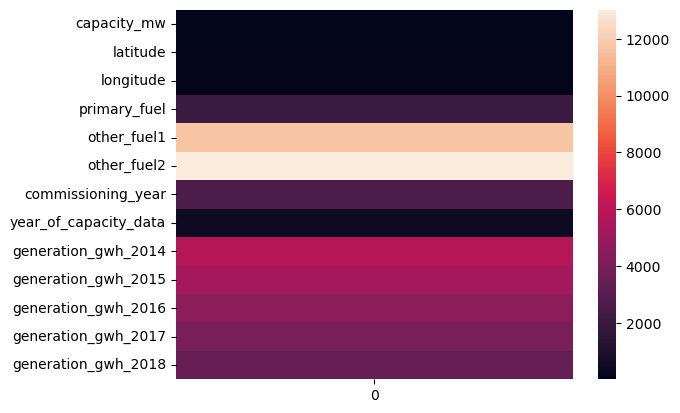

In [15]:
#we can see  Null values through Heatmap.

sns.heatmap(g_pp.isnull().sum().to_frame())
plt.show()

In [16]:
#checking for any duplicate values .
g_pp.duplicated().sum()

57

Since there are still numerous null and duplicate values in the datasets, we will proceed to fill these null values.

# Complete the missing values and again check null values.

In [17]:
# For categorical columns replacing the missing values with mode-
g_pp['other_fuel1'].fillna(g_pp['other_fuel1'].mode()[0], inplace=True)
g_pp['other_fuel2'].fillna(g_pp['other_fuel2'].mode()[0], inplace=True)
g_pp['primary_fuel'].fillna(g_pp['primary_fuel'].mode()[0], inplace=True)

In [18]:
# For numerical /continuous columns replacing the missing values with mean-
for i in g_pp.columns:
    if g_pp[i].dtypes =='float64':
        g_pp[i] = g_pp[i].fillna(np.mean(g_pp[i]))

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
other_fuel2              0
commissioning_year       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64


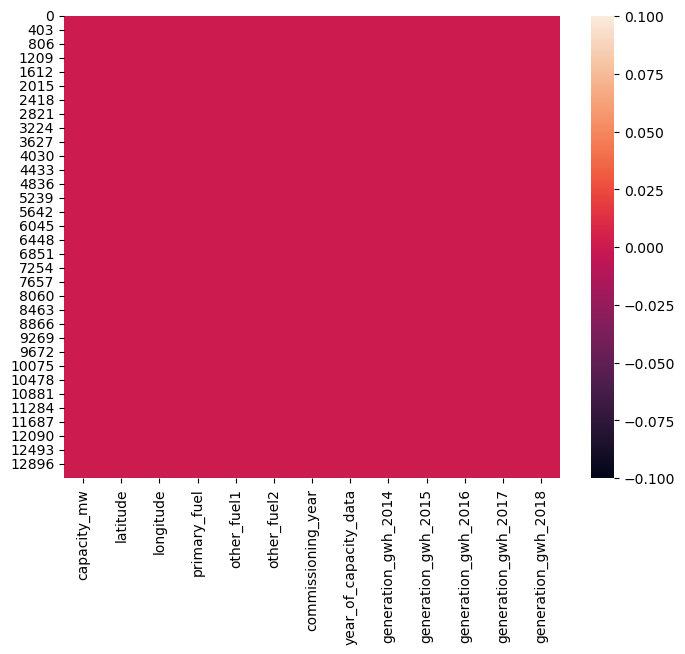

In [19]:
plt.figure(figsize=[8,6])
sns.heatmap(g_pp.isnull())
print(g_pp.isnull().sum())

After filling in the null values, there are no longer any null values present in the dataset.

# Correlation of Dataset


In [124]:
g_pp.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,-0.080810,0.127417,-0.362352,-0.037931,0.025880,-0.073465,0.769397,0.789521,0.793396,0.795445,0.807174
latitude,-0.080810,1.000000,-0.775317,0.099134,-0.016973,0.019406,-0.027635,-0.062091,-0.064229,-0.069707,-0.074479,-0.076225
longitude,0.127417,-0.775317,1.000000,-0.166047,0.011670,-0.019859,-0.001944,0.107483,0.113410,0.121007,0.129664,0.134100
primary_fuel,-0.362352,0.099134,-0.166047,1.000000,0.000531,-0.109287,0.413266,-0.180305,-0.195540,-0.204093,-0.211621,-0.222371
other_fuel1,-0.037931,-0.016973,0.011670,0.000531,1.000000,-0.121180,0.065884,-0.008956,-0.011219,-0.004809,-0.009281,-0.013357
other_fuel2,0.025880,0.019406,-0.019859,-0.109287,-0.121180,1.000000,-0.059280,-0.001082,0.004167,0.001732,0.004291,0.006400
commissioning_year,-0.073465,-0.027635,-0.001944,0.413266,0.065884,-0.059280,1.000000,-0.006786,-0.008742,-0.017524,-0.028696,-0.036805
generation_gwh_2014,0.769397,-0.062091,0.107483,-0.180305,-0.008956,-0.001082,-0.006786,1.000000,0.966543,0.931666,0.912316,0.904722
generation_gwh_2015,0.789521,-0.064229,0.113410,-0.195540,-0.011219,0.004167,-0.008742,0.966543,1.000000,0.960081,0.936988,0.935031
generation_gwh_2016,0.793396,-0.069707,0.121007,-0.204093,-0.004809,0.001732,-0.017524,0.931666,0.960081,1.000000,0.966268,0.952001


<Axes: >

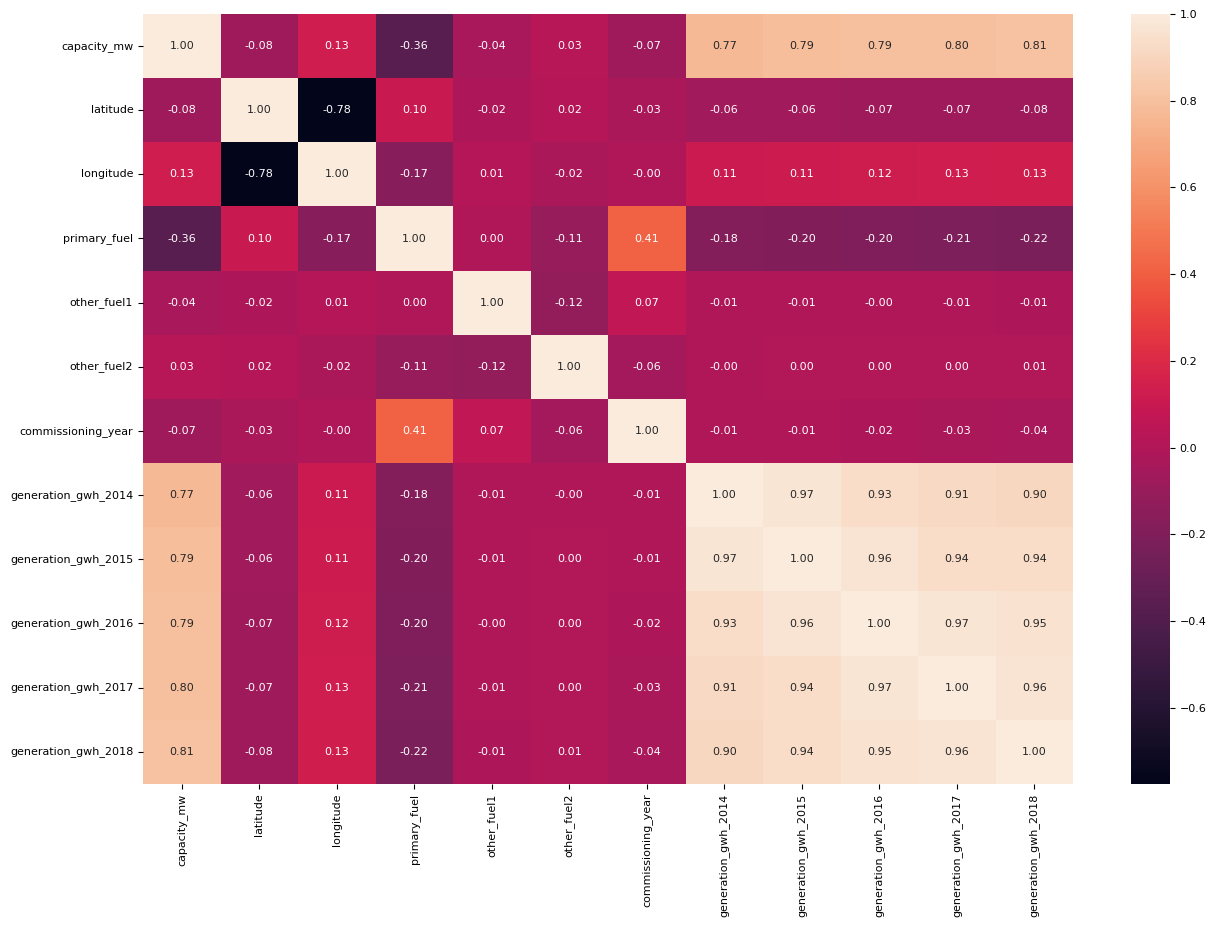

In [125]:
#Plotting the correlation of columns

plt.figure(figsize=[15,10])
sns.heatmap(g_pp.corr(),annot = True, fmt = '0.2f')

The columns 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018' are positively correlated with the target variable 'capacity_mw'. In contrast, 'latitude', 'longitude', 'primary_fuel', 'other_fuel1','other_fuel2' and 'commissioning_year' are negatively correlated with 'capacity_mw'.

In [126]:
g_pp.corr()['capacity_mw'].sort_values(ascending = False)

capacity_mw            1.000000
generation_gwh_2018    0.807174
generation_gwh_2017    0.795445
generation_gwh_2016    0.793396
generation_gwh_2015    0.789521
generation_gwh_2014    0.769397
longitude              0.127417
other_fuel2            0.025880
other_fuel1           -0.037931
commissioning_year    -0.073465
latitude              -0.080810
primary_fuel          -0.362352
Name: capacity_mw, dtype: float64

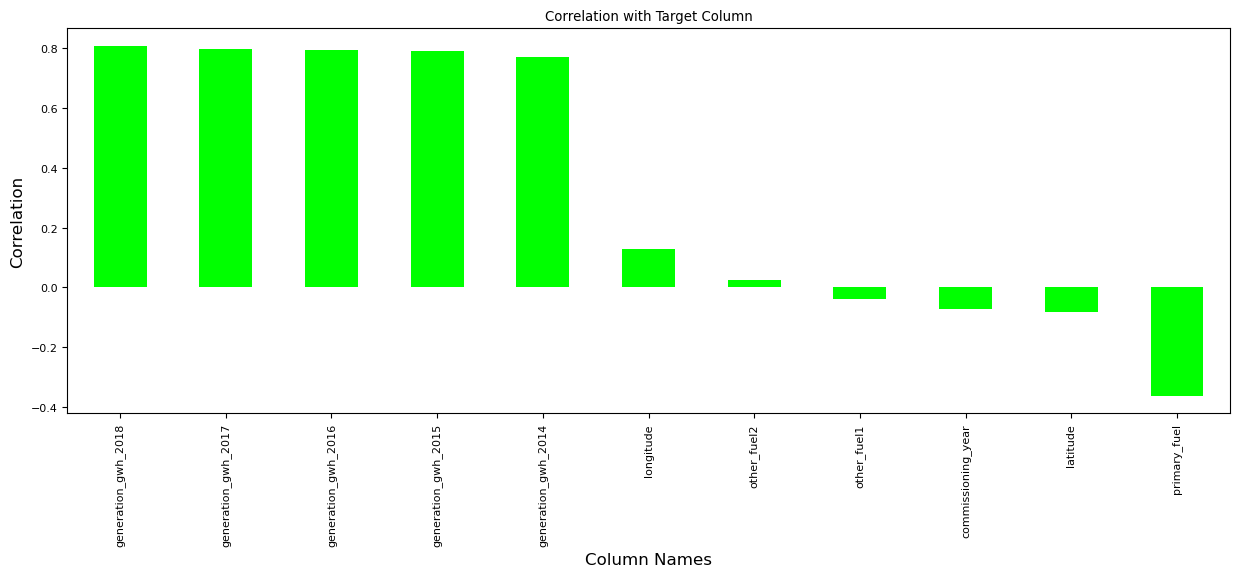

In [127]:
#considering target variable as capacity_mw
plt.figure(figsize = [15,5])
g_pp.corr()['capacity_mw'].sort_values(ascending= False).drop('capacity_mw').plot(kind = 'bar', color ='lime')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Except for the 'primary_fuel' column, all other columns exhibit a positive correlation with the target variable 'capacity_mw'. Among them, 'generation_gwh_2018' has the highest positive correlation with 'capacity_mw', while 'other_fuel1' has the least positive correlation. 'Primary_fuel','latitude','commissioning_year' is the  column that shows a negative correlation with 'capacity_mw'.

In [128]:
g_pp.corr()['primary_fuel'].sort_values(ascending = False)

primary_fuel           1.000000
commissioning_year     0.413266
latitude               0.099134
other_fuel1            0.000531
other_fuel2           -0.109287
longitude             -0.166047
generation_gwh_2014   -0.180305
generation_gwh_2015   -0.195540
generation_gwh_2016   -0.204093
generation_gwh_2017   -0.211621
generation_gwh_2018   -0.222371
capacity_mw           -0.362352
Name: primary_fuel, dtype: float64

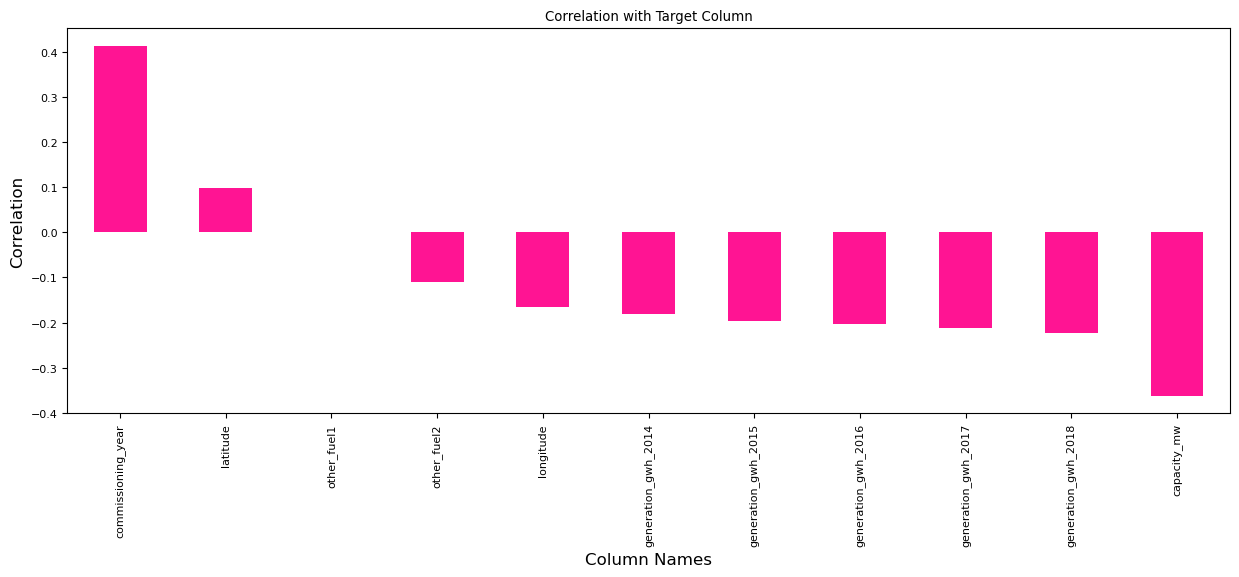

In [129]:
#considering target variable primary fuel
plt.figure(figsize = [15,5])
g_pp.corr()['primary_fuel'].sort_values(ascending= False).drop('primary_fuel').plot(kind = 'bar', color ='deeppink')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()


Except for the columns 'commissioning_year', 'latitude', and 'other_fuel1', all other columns have a negative correlation with the target variable 'primary_fuel'. The columns 'commissioning_year', 'latitude', and 'other_fuel1' have a positive correlation with 'primary_fuel'. The column 'capacity_mw' shows the highest negative correlation with 'primary_fuel', while 'other_fuel2' has the least negative correlation with 'primary_fuel'.

# Data visualisation

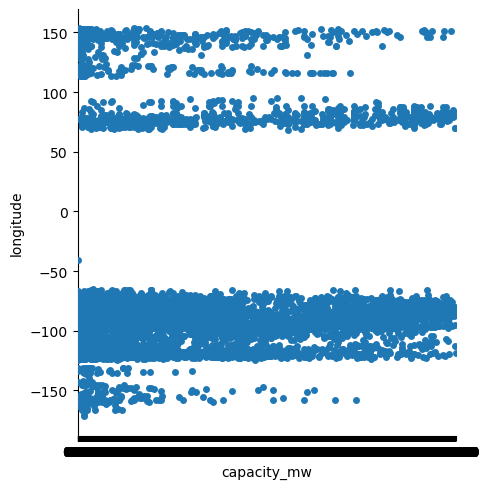

In [20]:
sns.catplot(x='capacity_mw',y='longitude',data=g_pp)

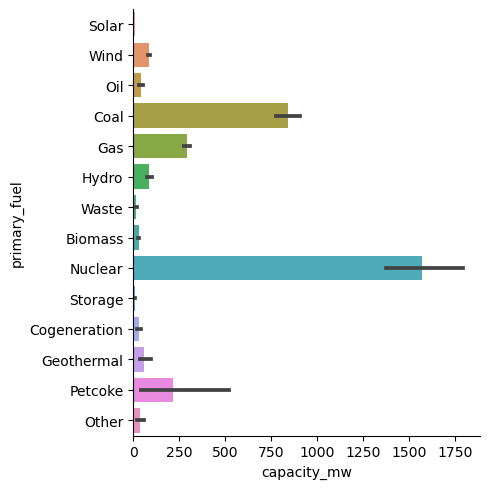

In [21]:
sns.catplot(y='primary_fuel',x='capacity_mw',data=g_pp,kind='bar')

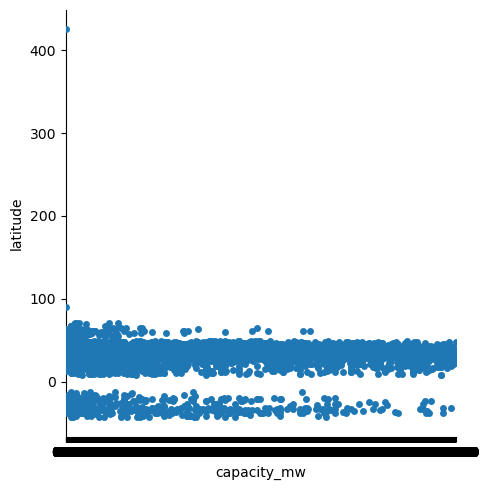

In [22]:
sns.catplot(x='capacity_mw',y='latitude',data=g_pp)

In [23]:
features=g_pp[['latitude','longitude','capacity_mw','commissioning_year','year_of_capacity_data','generation_gwh_2014',
              'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

<function matplotlib.pyplot.show(close=None, block=None)>

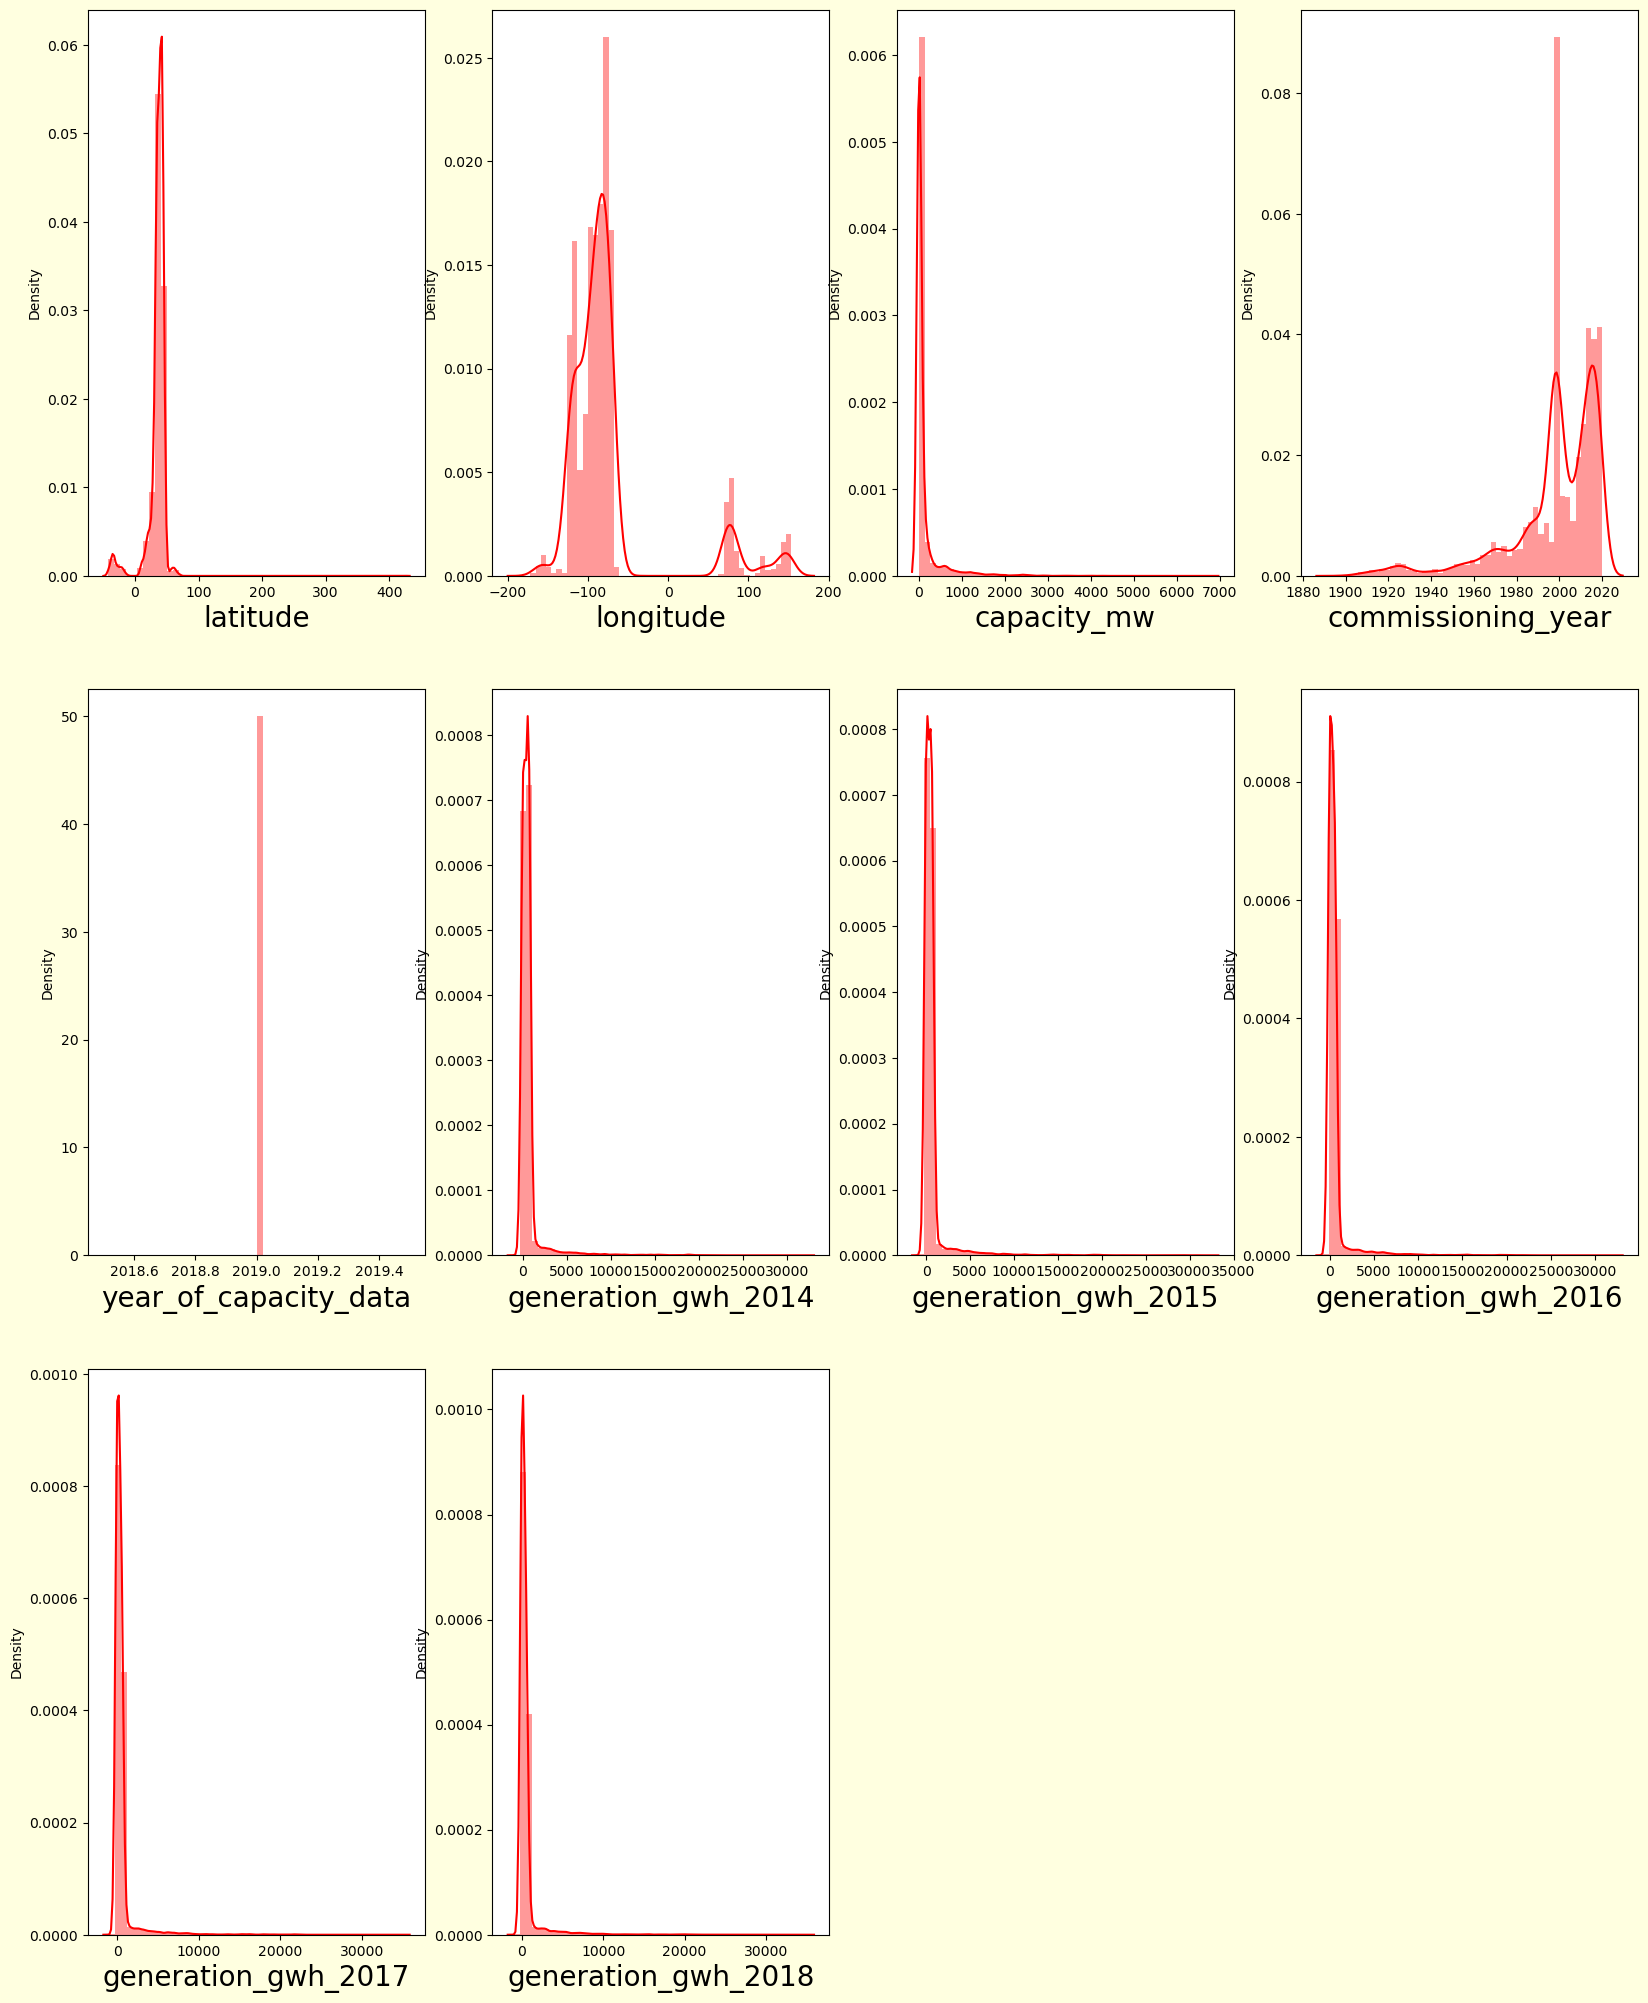

In [24]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnum=1
for col in features:
    if plotnum<=15:
        plt.subplot(3,4,plotnum)
        sns.distplot(features[col],color='red')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show

The columns 'capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018' exhibit right skewness. Conversely, the 'Latitude' column follows a normal distribution, while the 'Longitude' column displays a slight right skew. Most power plants were commissioned between 1987 and 2002.

<Axes: xlabel='capacity_mw', ylabel='Density'>

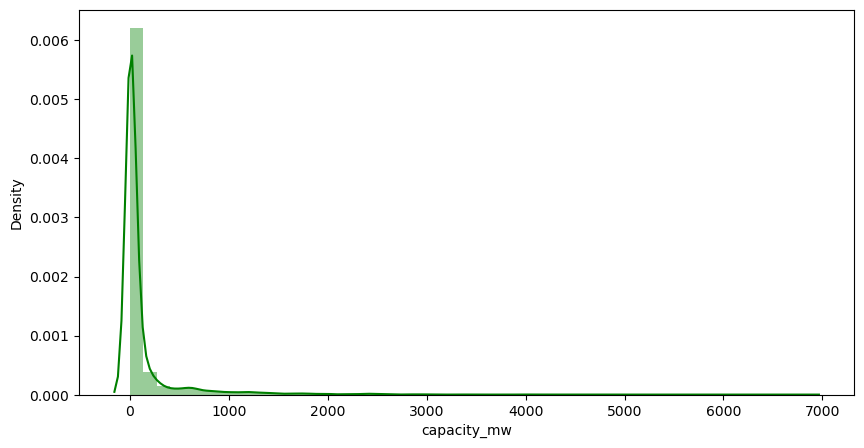

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(g_pp.capacity_mw,kde=True,color='green')

<Axes: xlabel='count', ylabel='primary_fuel'>

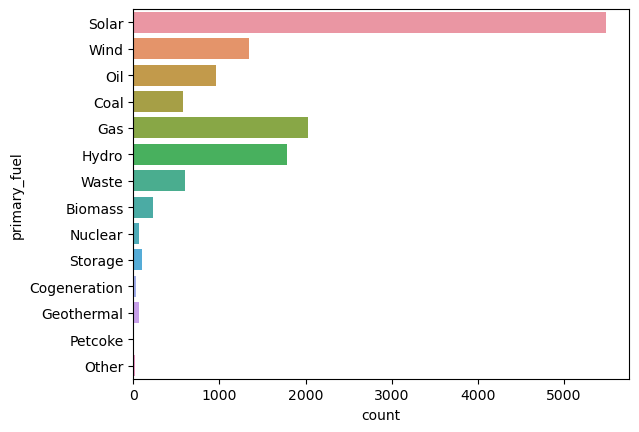

In [26]:
g_pp['primary_fuel'].value_counts()
sns.countplot(y=g_pp['primary_fuel'])

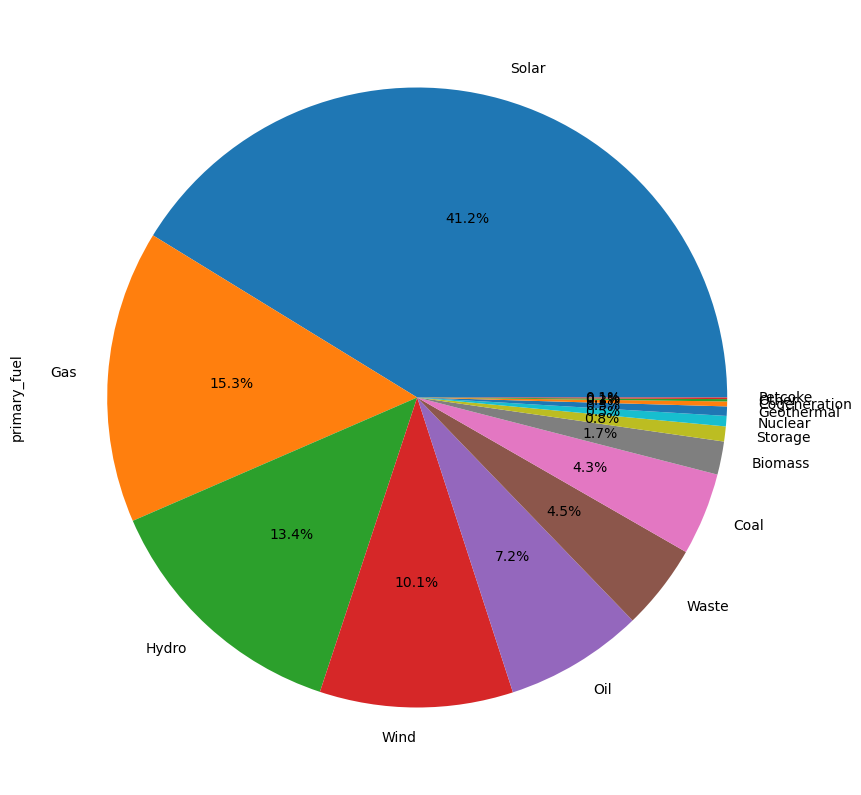

In [27]:
plt.figure(figsize=(10,30))
g_pp['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.rcParams['font.size'] = 8


<Axes: xlabel='longitude', ylabel='latitude'>

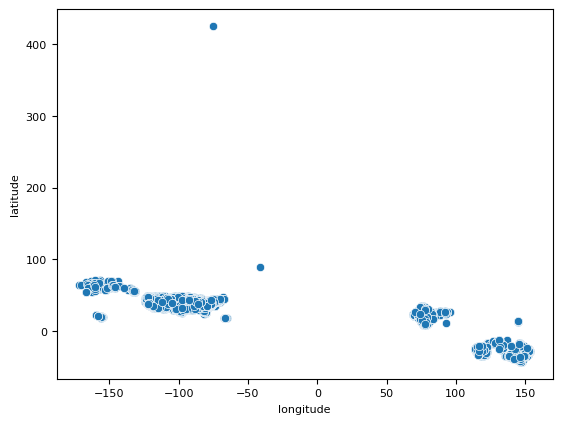

In [28]:
sns.scatterplot(x='longitude',y='latitude',data = g_pp)

<function matplotlib.pyplot.show(close=None, block=None)>

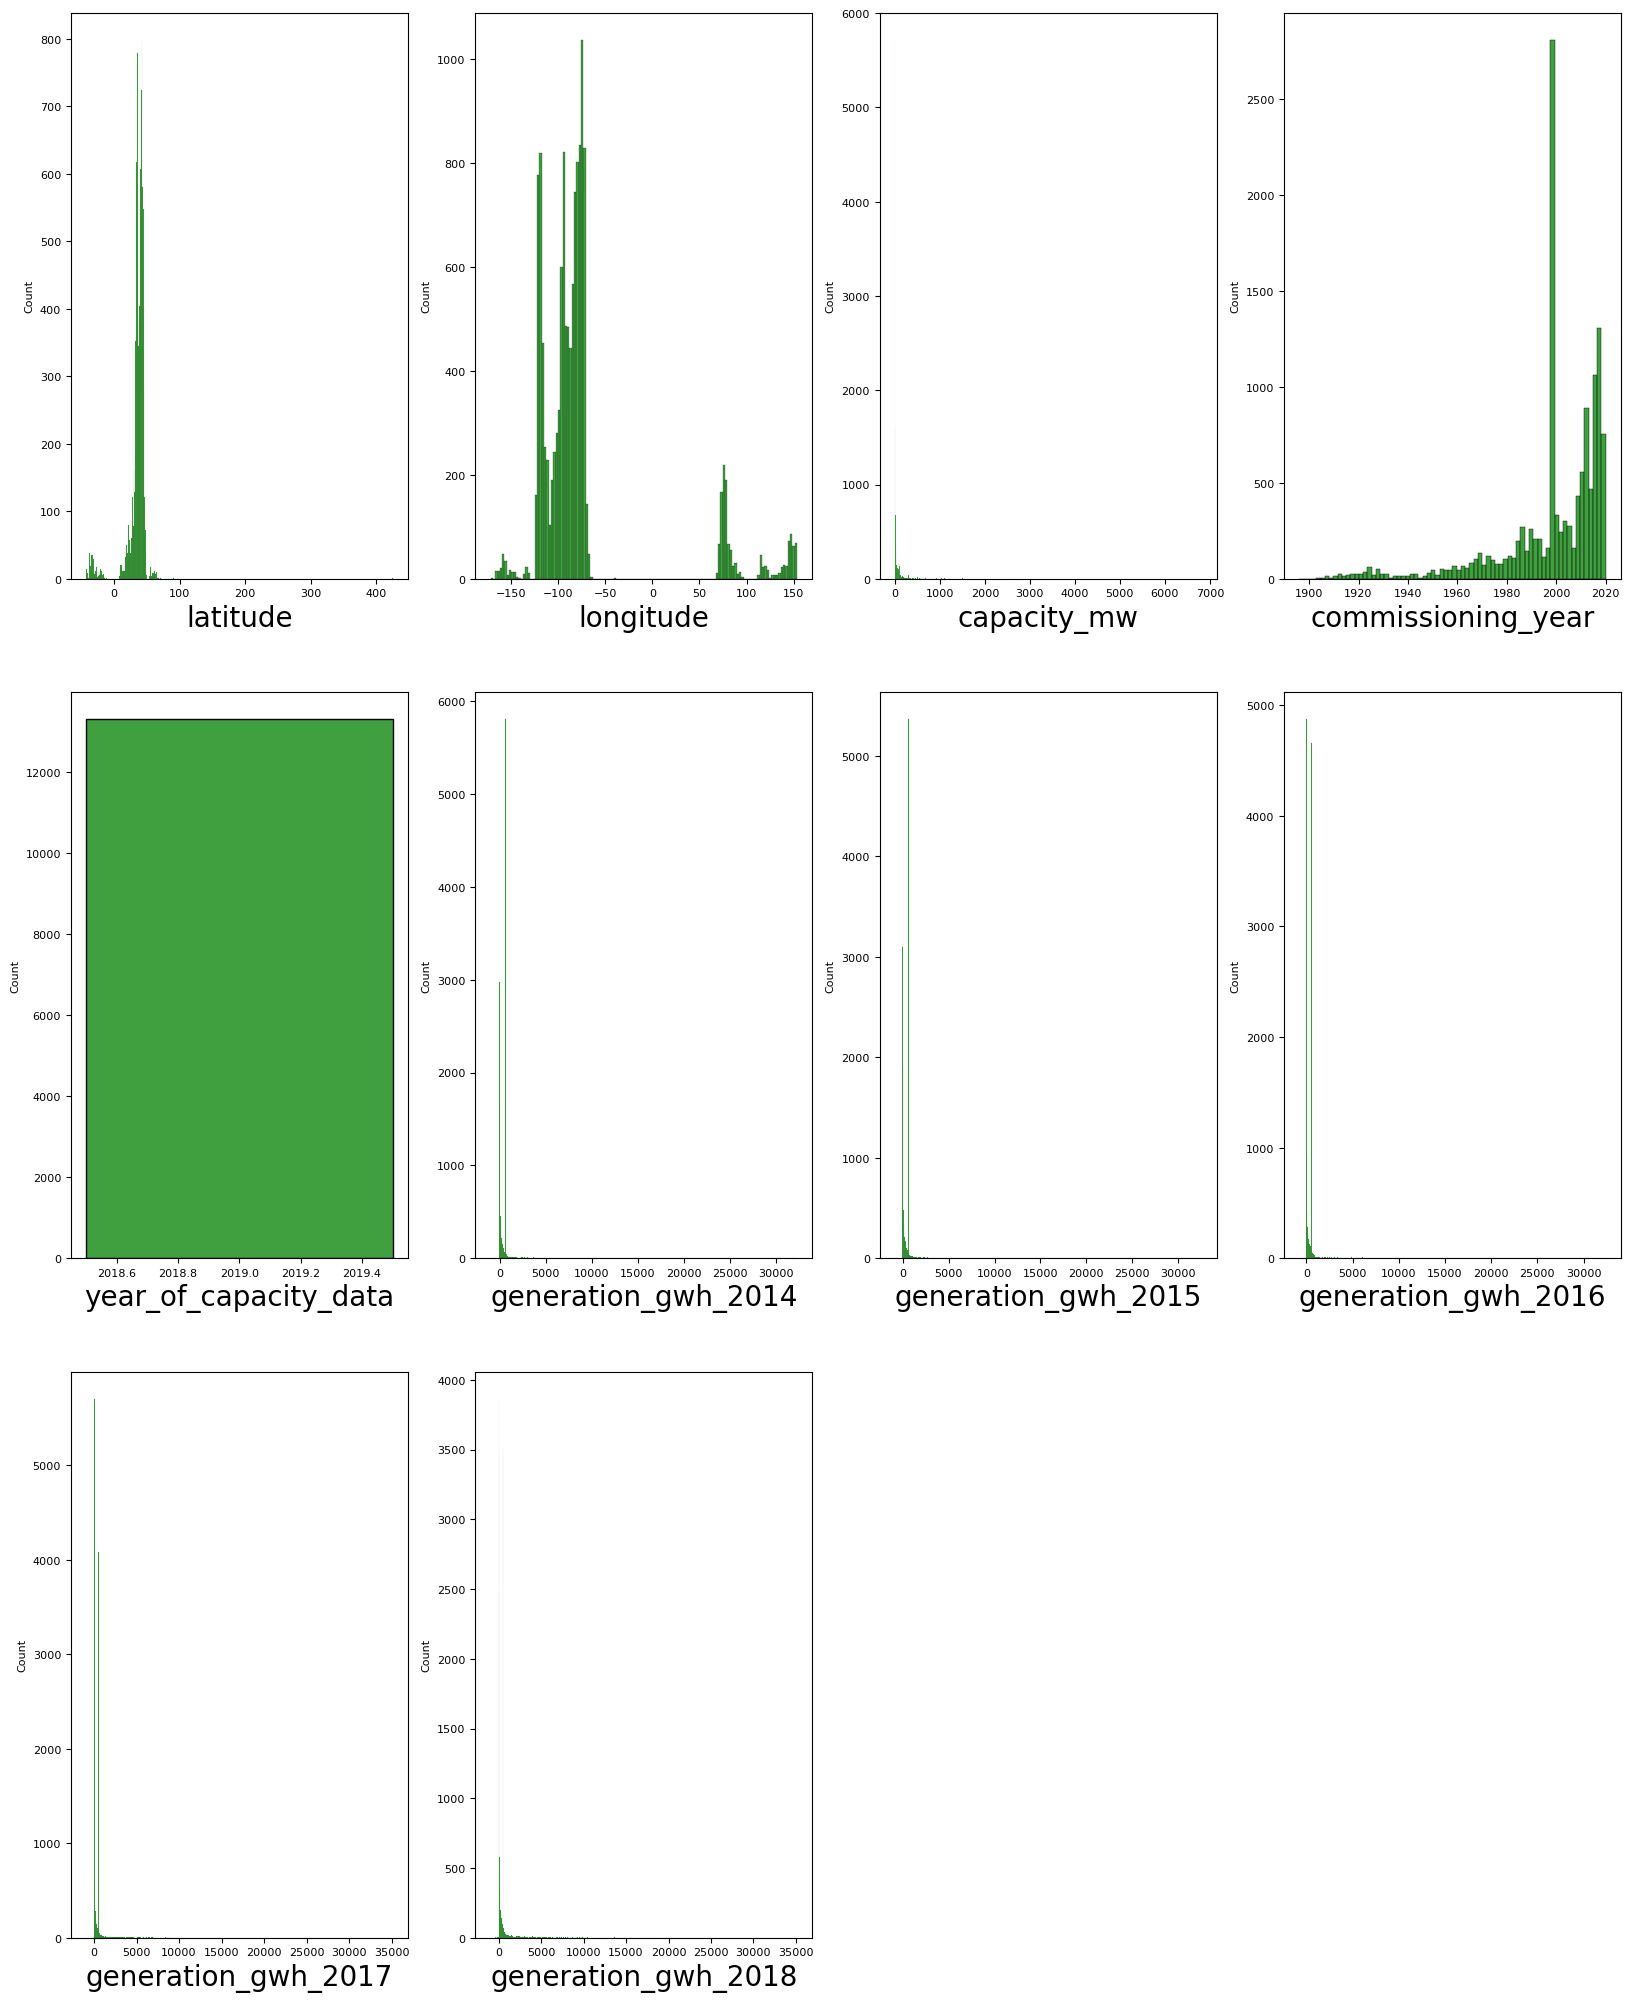

In [29]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in features:
    if plotnum<=15:
        plt.subplot(3,4,plotnum)
        sns.histplot(features[col],color='green')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show

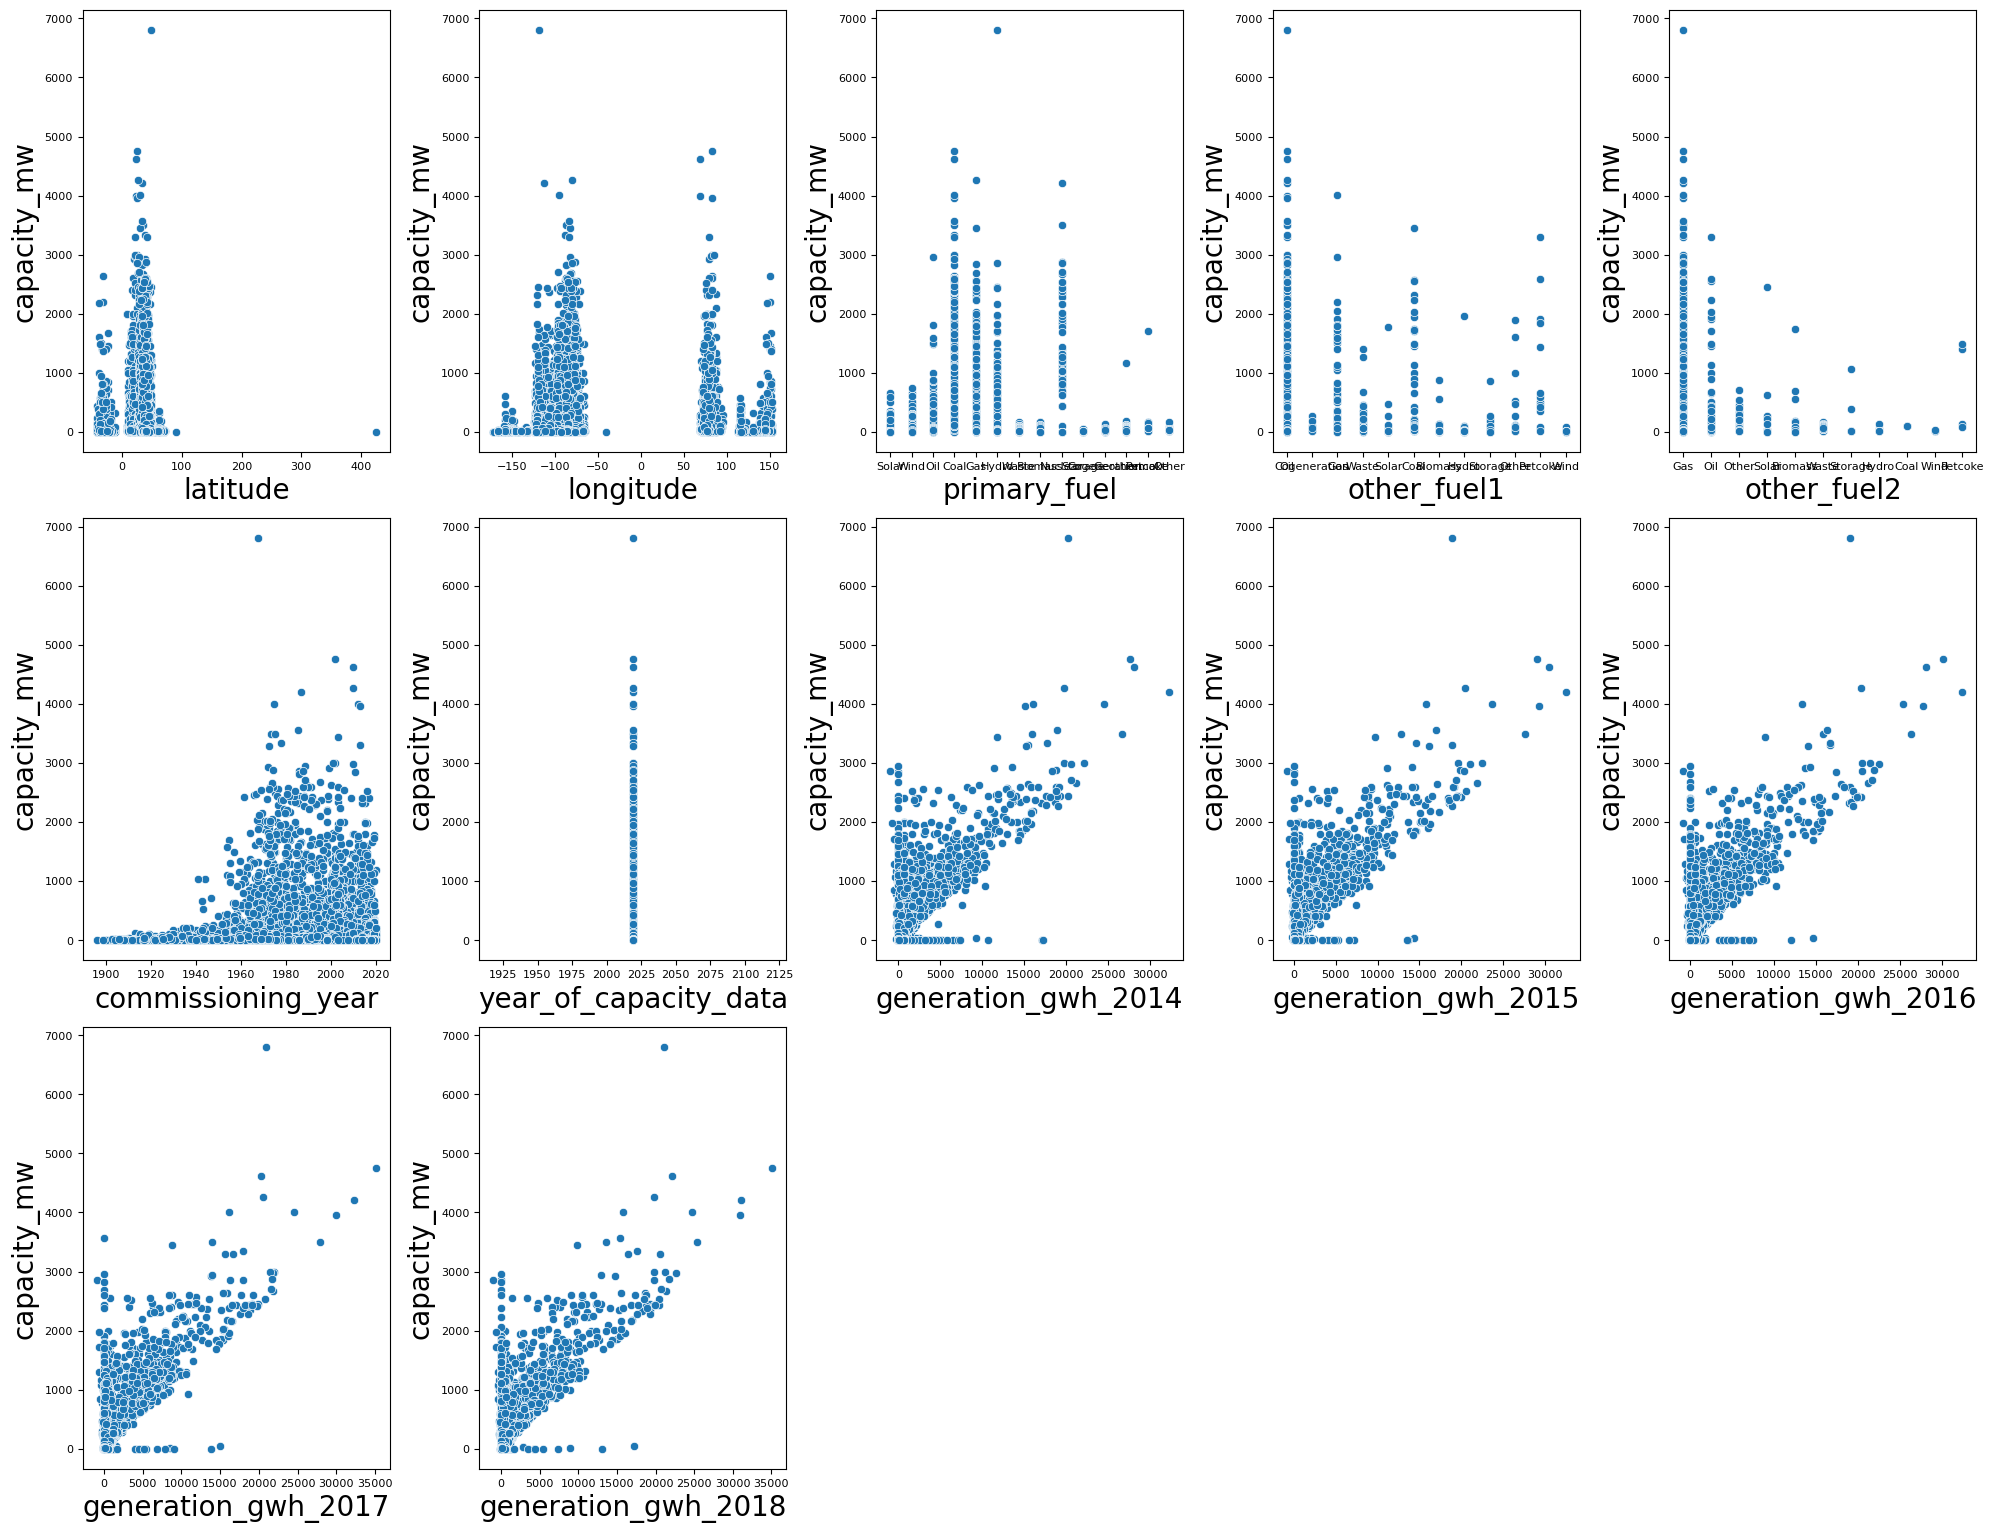

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

X = g_pp.drop(columns=['capacity_mw'])
y = g_pp['capacity_mw']

for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(x=X[col],y=y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

<Figure size 1500x800 with 0 Axes>

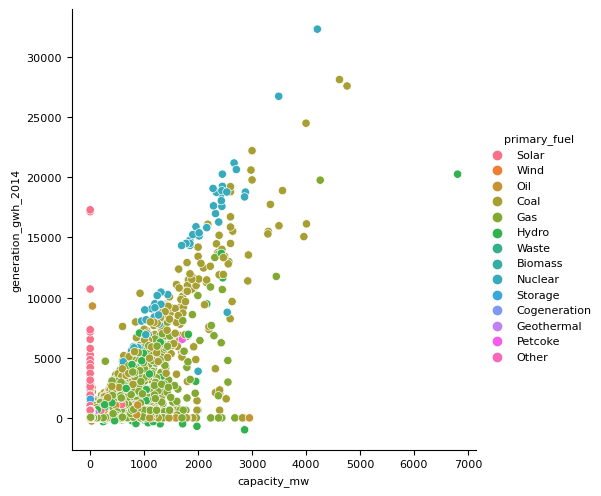

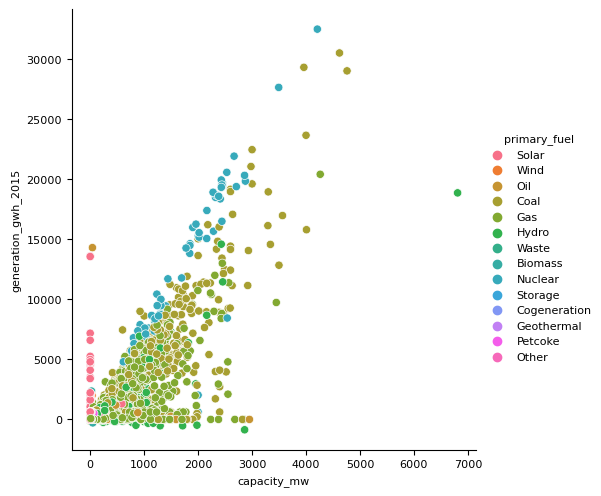

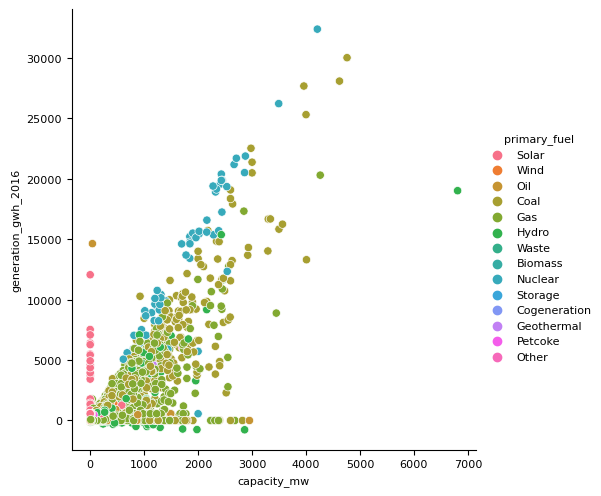

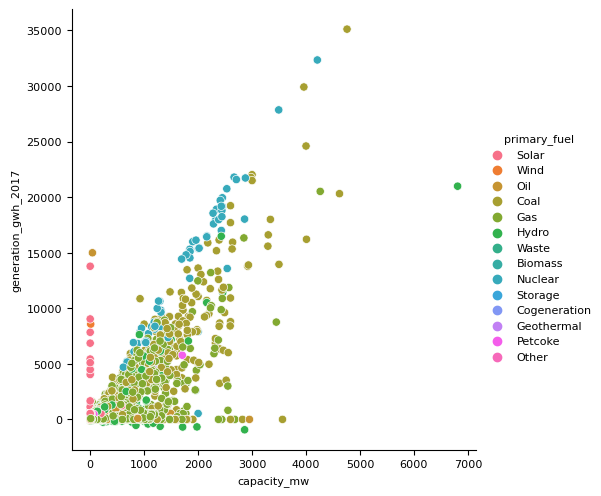

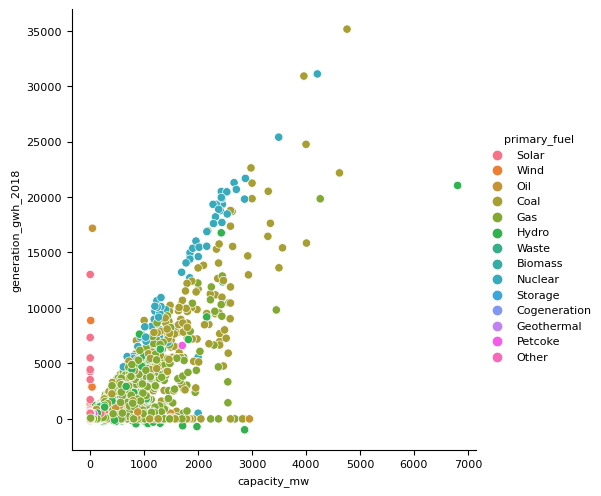

In [31]:
generation = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
plt.figure(figsize=(15,8))
for i in generation:
    sns.relplot(x='capacity_mw',y=i, data = g_pp, hue ='primary_fuel')

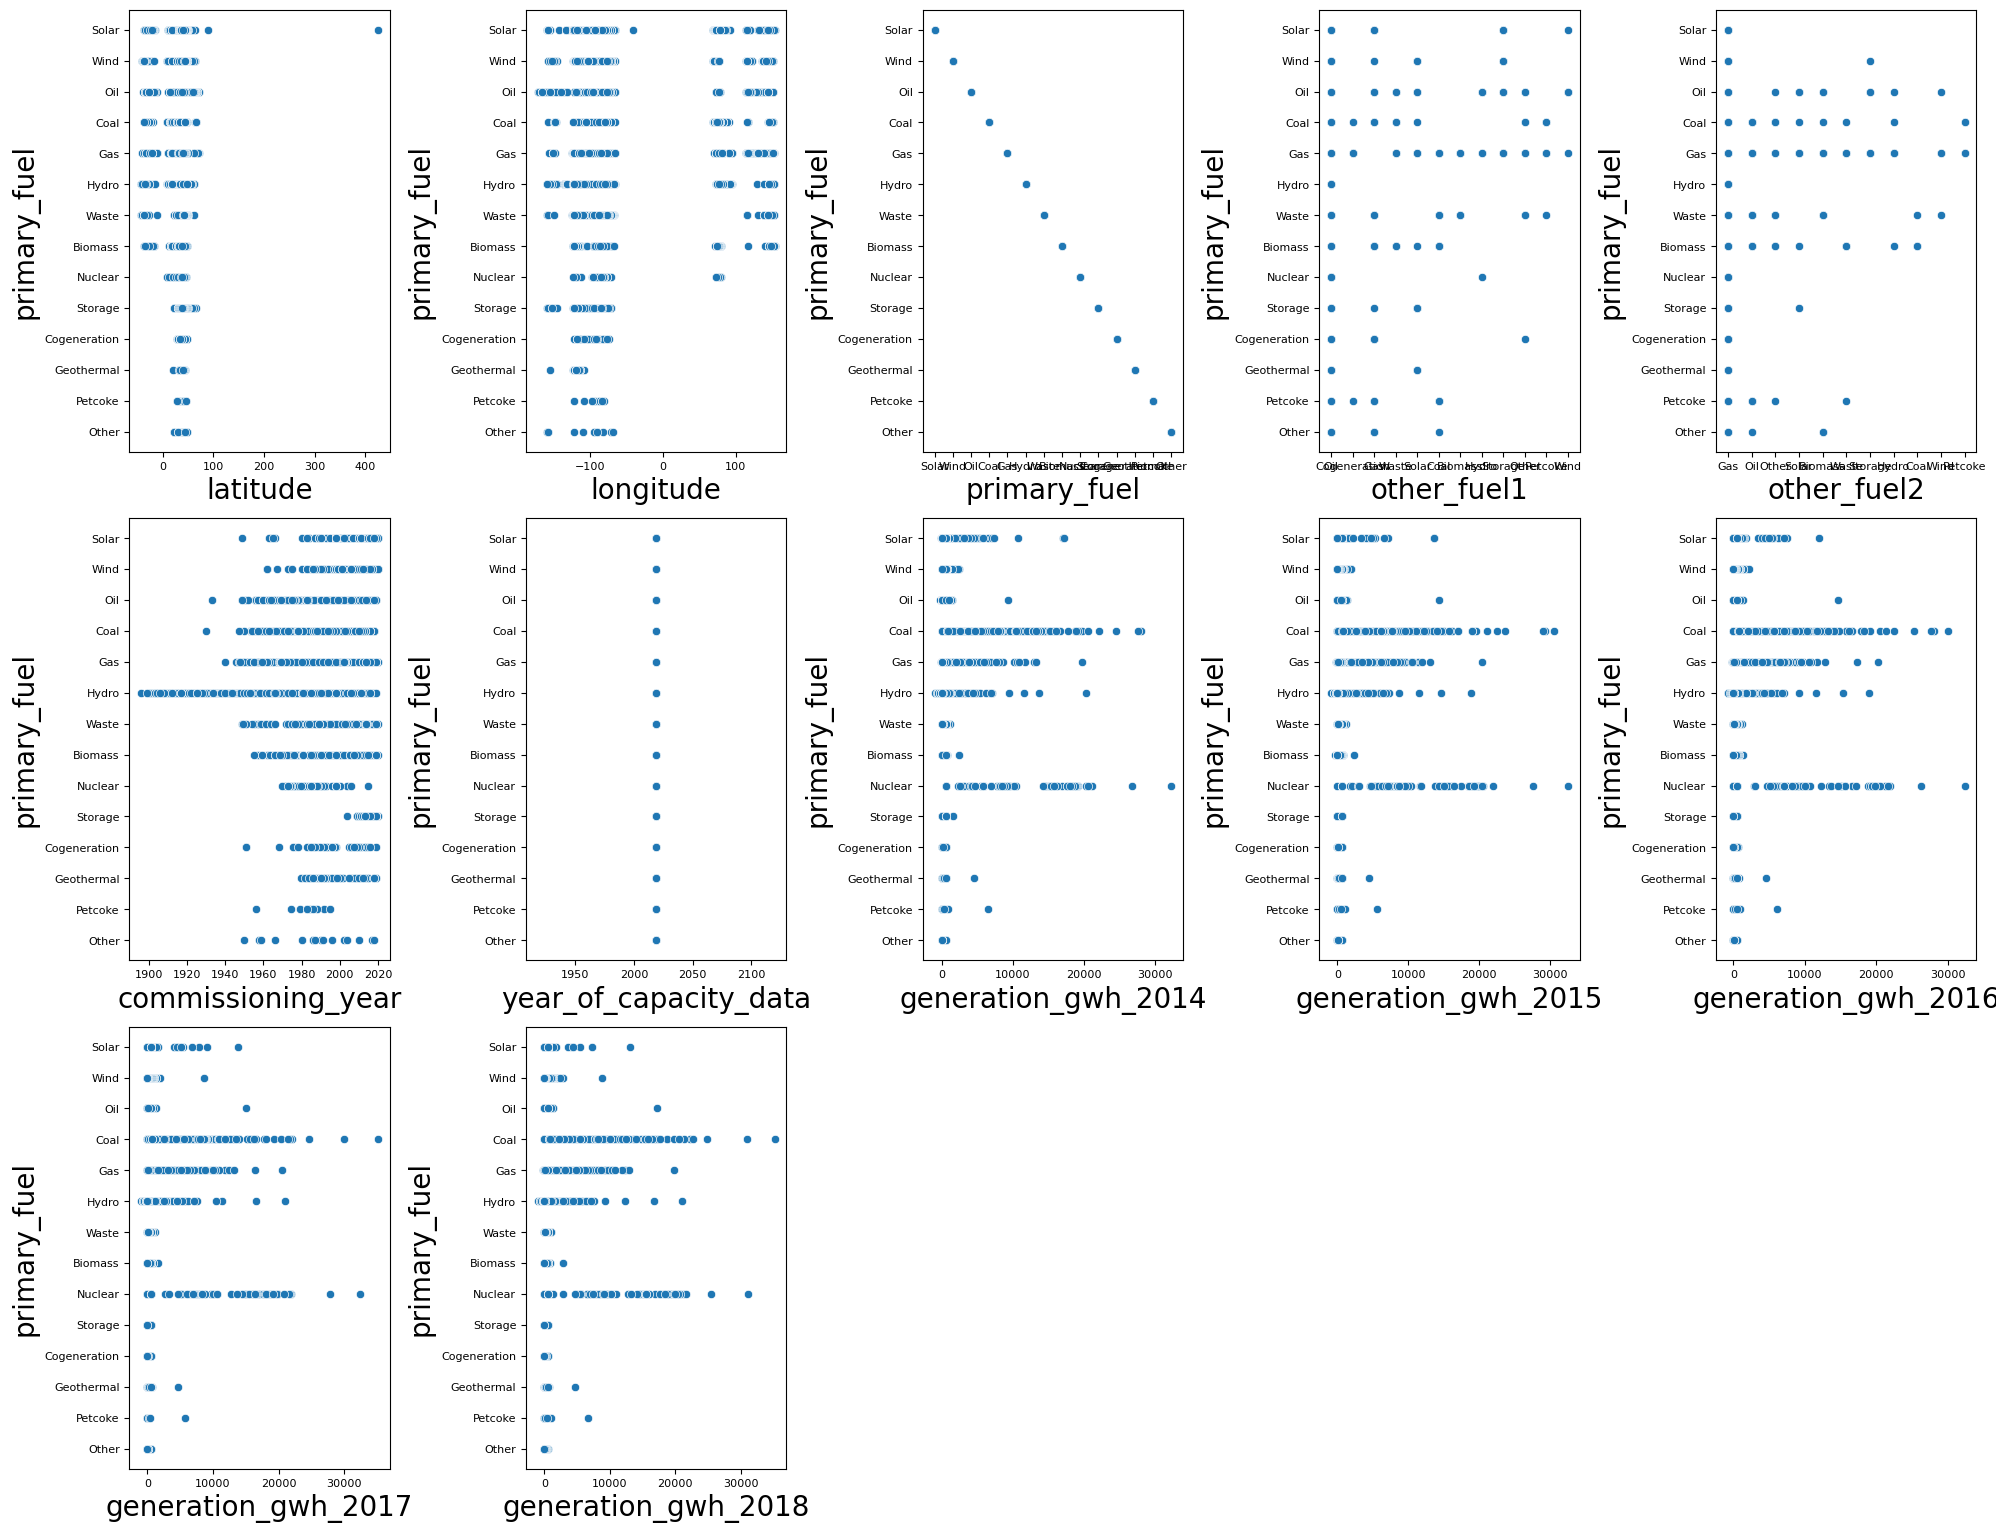

In [32]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

x = g_pp.drop(columns=['primary_fuel'])
y = g_pp['primary_fuel']

for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(x=X[col],y=y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('primary_fuel',fontsize=20)
    plotnum+=1
plt.tight_layout()


In [33]:
g_pp.nunique()

capacity_mw               2305
latitude                 12386
longitude                12734
primary_fuel                14
other_fuel1                 12
other_fuel2                 11
commissioning_year        1937
year_of_capacity_data        1
generation_gwh_2014       6307
generation_gwh_2015       6693
generation_gwh_2016       7151
generation_gwh_2017       7631
generation_gwh_2018       8041
dtype: int64

We can drop the 'year_of_capacity_data' column as it does not contribute to the predictions.

In [34]:
g_pp.drop(['year_of_capacity_data'],axis = 1,inplace = True)
g_pp.shape

(13298, 12)

# Lable Encoding

In [35]:
g_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          13298 non-null  float64
 1   latitude             13298 non-null  float64
 2   longitude            13298 non-null  float64
 3   primary_fuel         13298 non-null  object 
 4   other_fuel1          13298 non-null  object 
 5   other_fuel2          13298 non-null  object 
 6   commissioning_year   13298 non-null  float64
 7   generation_gwh_2014  13298 non-null  float64
 8   generation_gwh_2015  13298 non-null  float64
 9   generation_gwh_2016  13298 non-null  float64
 10  generation_gwh_2017  13298 non-null  float64
 11  generation_gwh_2018  13298 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.2+ MB


In [36]:
# Encoding the data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
encode = ['primary_fuel','other_fuel1','other_fuel2']
for col in encode:
    g_pp[col] = le.fit_transform(g_pp[col].values.reshape(-1,1))     


In [38]:
g_pp.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int64
other_fuel1              int64
other_fuel2              int64
commissioning_year     float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

We can see that there are no object data types remaining in the dataset.

# Outlier Detection

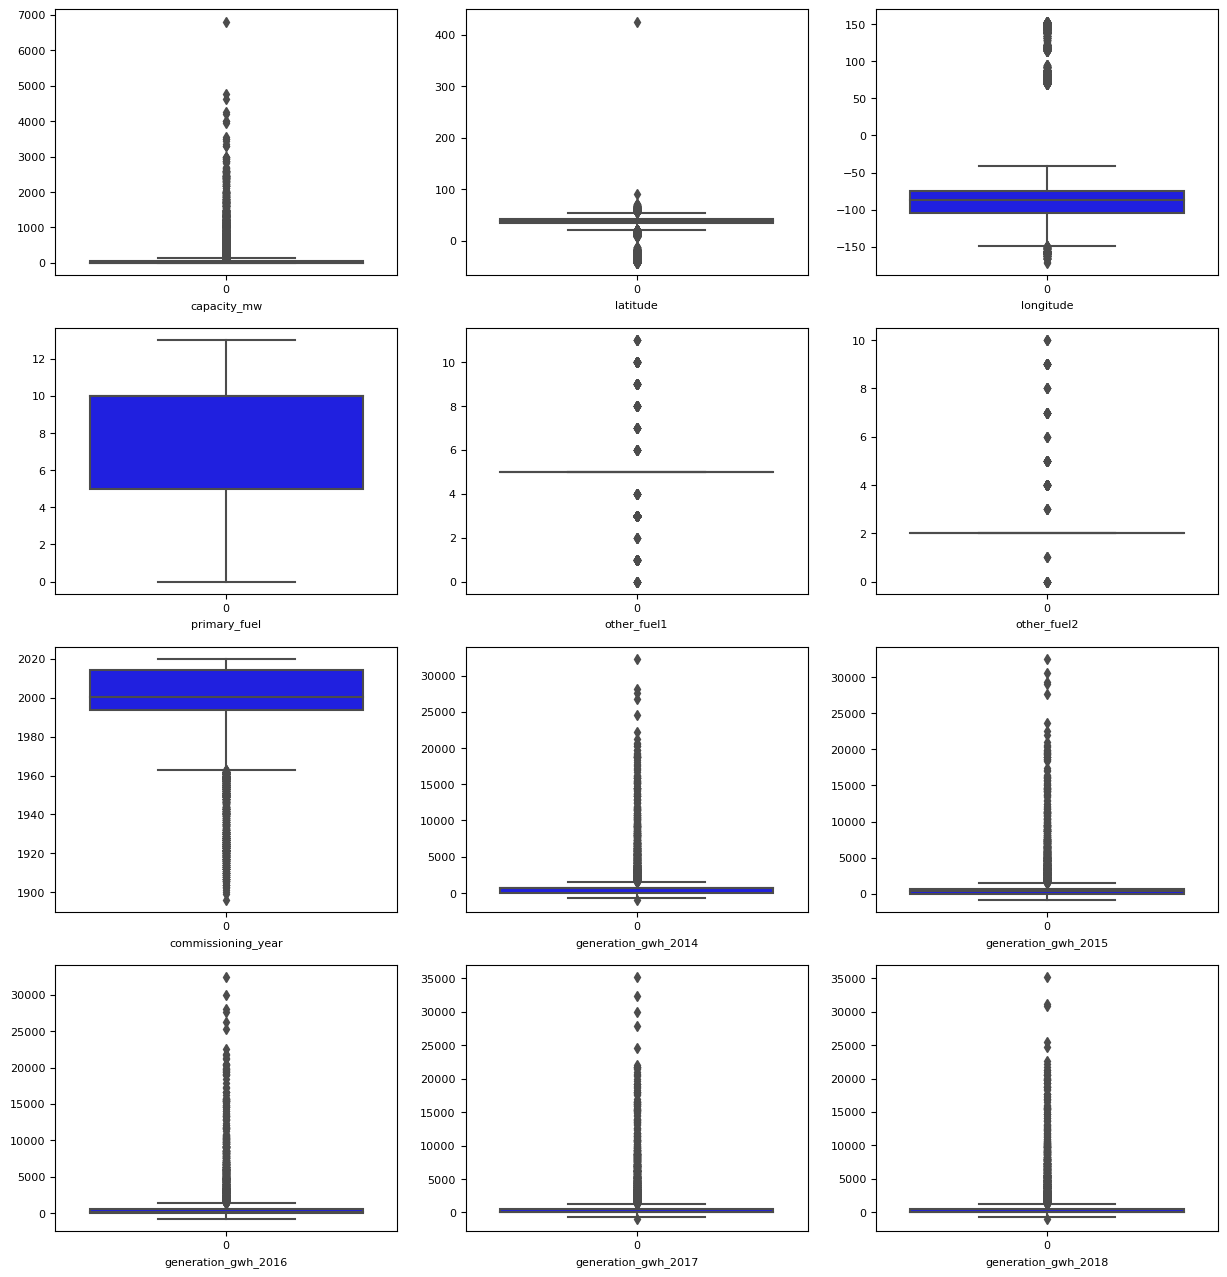

In [45]:
plt.figure(figsize=(15,20))
plot=1
for col in g_pp:
    if plot<=15:
        plt.subplot(5,3,plot)
        sns.boxplot(g_pp[col],color = 'b')
        plt.xlabel(col)
        plot=plot+1
plt.show()

capacity_mw               Axes(0.125,0.653529;0.168478x0.226471)
latitude               Axes(0.327174,0.653529;0.168478x0.226471)
longitude              Axes(0.529348,0.653529;0.168478x0.226471)
primary_fuel           Axes(0.731522,0.653529;0.168478x0.226471)
other_fuel1               Axes(0.125,0.381765;0.168478x0.226471)
other_fuel2            Axes(0.327174,0.381765;0.168478x0.226471)
commissioning_year     Axes(0.529348,0.381765;0.168478x0.226471)
generation_gwh_2014    Axes(0.731522,0.381765;0.168478x0.226471)
generation_gwh_2015           Axes(0.125,0.11;0.168478x0.226471)
generation_gwh_2016        Axes(0.327174,0.11;0.168478x0.226471)
generation_gwh_2017        Axes(0.529348,0.11;0.168478x0.226471)
generation_gwh_2018        Axes(0.731522,0.11;0.168478x0.226471)
dtype: object

<Figure size 1000x800 with 0 Axes>

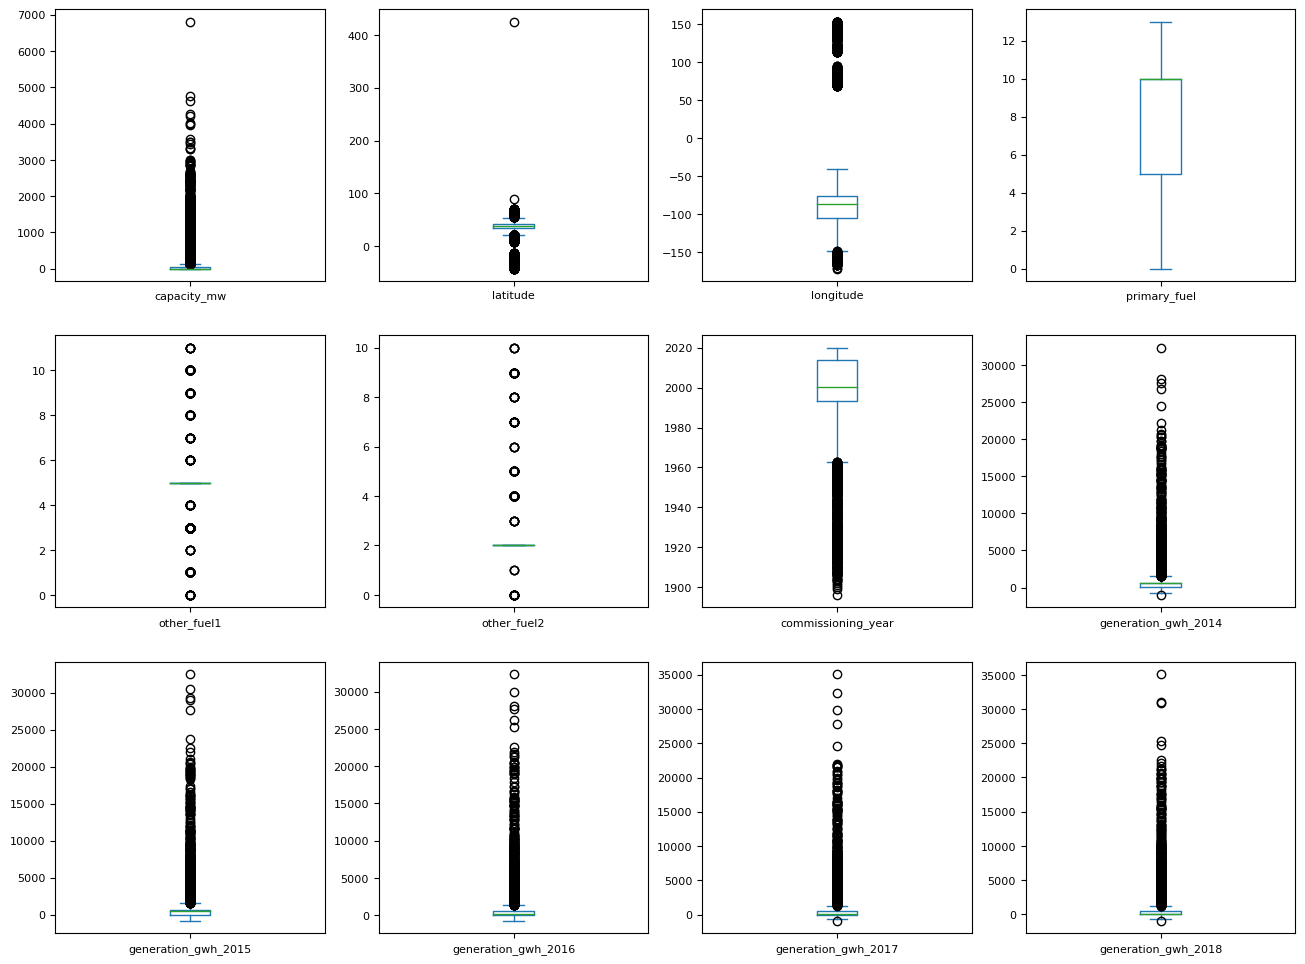

In [46]:
#Checking for outliers
plt.figure(figsize = [10,8])
g_pp.plot(kind='box',subplots=True,layout=(3,4),figsize=(16,12))

All columns contain outliers except for 'latitude' and 'primary_fuel'.

# Removing Outliers


In [47]:
# Removing Outliers
from scipy.stats import zscore

z=np.abs(zscore(g_pp))

gpp_new= g_pp[(z < 3).all(axis=1)]   #taking 3 as threshold value
gpp_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
512,2.5,28.1839,73.2407,10,5,2,2011.000000,635.739731,616.801877,561.784508,532.472482,513.679016
513,98.0,24.7663,74.6090,1,5,2,1998.184904,635.739731,616.801877,561.784508,532.472482,513.679016
514,39.2,21.9038,69.3732,13,5,2,1998.184904,635.739731,616.801877,561.784508,532.472482,513.679016
515,135.0,23.8712,91.3602,3,5,2,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
517,250.0,23.7689,68.6447,1,5,2,2005.000000,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
...,...,...,...,...,...,...,...,...,...,...,...,...
13293,3.4,42.8869,-76.9683,13,5,2,2012.000000,2.460150,2.489000,1.670000,1.233490,2.630000
13294,1.0,44.3195,-92.6703,10,5,2,2018.000000,635.739731,616.801877,561.784508,532.472482,1.161000
13295,0.0,44.0460,-92.7600,10,5,2,1998.184904,635.739731,616.801877,561.784508,532.472482,513.679016
13296,0.0,39.7373,-105.0170,10,5,2,1998.184904,0.000000,0.000000,561.784508,532.472482,513.679016


In [48]:
#if we check the previous data dimension 
g_pp.shape

(13298, 12)

In [49]:
gpp_new.shape

(11633, 12)

In [137]:
# Checking the percentage of data loss -
loss = (g_pp.shape[0]-gpp_new.shape[0])/g_pp.shape[0]*100
print('loss of data: in %',loss)

loss of data: in % 12.520679801473905


# Splitting the dataset

# 1-Prediction using primary_fuel

In [111]:
#Splitting the data into 'x' and 'y' labels-
x=gpp_new.drop('primary_fuel',axis=1)
y=gpp_new['primary_fuel']
print(x.shape)
print(y.shape)

(11633, 11)
(11633,)


In [112]:
print(y.value_counts())

10    5384
3     1677
5     1272
13    1251
7      872
12     499
1      314
0      147
11      93
4       61
2       34
8       13
6       11
9        5
Name: primary_fuel, dtype: int64



The values in the dataset are not balanced, so we need to balance the dataset first.

# Using SMOTE to balance the categorical data-


In [113]:
# Using SMOTE to balance the categorical data-

from imblearn.over_sampling import SMOTE
smo = SMOTE(k_neighbors=2)
x,y=smo.fit_resample(x,y)
y.value_counts()

10    5384
1     5384
13    5384
3     5384
5     5384
0     5384
7     5384
6     5384
12    5384
11    5384
2     5384
4     5384
8     5384
9     5384
Name: primary_fuel, dtype: int64

# Removing the skewness in data

In [114]:
#removing skewness in data
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

generation_gwh_2018     3.979290
generation_gwh_2017     3.914903
generation_gwh_2016     3.872550
generation_gwh_2015     3.599406
generation_gwh_2014     3.329370
capacity_mw             3.047575
longitude               2.067051
latitude               -0.549062
commissioning_year     -0.716680
other_fuel1            -2.273273
other_fuel2           -27.812113
dtype: float64

In [115]:
from sklearn.preprocessing import power_transform
cols = ['generation_gwh_2015','generation_gwh_2014','generation_gwh_2017','generation_gwh_2016','generation_gwh_2018','capacity_mw','longitude','latitude','commissioning_year','other_fuel1','other_fuel2']
for col in cols:
    x[col]=power_transform((x[col].values.reshape(-1,1)))
    

In [116]:
x.skew().sort_values(ascending= False)

other_fuel2            23.118213
longitude               1.040595
other_fuel1             0.485887
latitude                0.151292
capacity_mw             0.044500
commissioning_year     -0.079334
generation_gwh_2014    -2.988827
generation_gwh_2015    -4.031104
generation_gwh_2016    -4.212103
generation_gwh_2017    -6.022266
generation_gwh_2018    -6.306724
dtype: float64

The skewness is greater in the 'other_fuel2' column.

In [117]:
x = x.drop(['other_fuel2'],axis = 1)

In [118]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x = pd.DataFrame(x_sc,columns = x.columns)

In [119]:
x.shape

(75376, 10)

# Checking multicollinearity using Variance Inflation Factor


In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vifscore(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values('VIF Factor',ascending = False))
vifscore(x)

,Column Name,VIF Factor
8,generation_gwh_2017,19.537540
6,generation_gwh_2015,18.925662
7,generation_gwh_2016,15.544187
5,generation_gwh_2014,12.164453
9,generation_gwh_2018,12.038395
2,longitude,1.518187
1,latitude,1.407851
0,capacity_mw,1.298889
4,commissioning_year,1.208344
3,other_fuel1,1.067589


There is multicollinearity present in our data.The VIF Score of 'generation_gwh_2016','generation_gwh_2017' and 'generation_gwh_2015' are high 

we cannot further miss-out more data from the dataset, we will proceed with further ahead keep this data same .

# ML Model Building

In [121]:
#CLASSIFICATION APPROACH using 'primary_fuel' target variable
# Models:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# for cross validation
from sklearn.model_selection import cross_val_score

#Matrics for Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score


In [122]:
Model_classify = [RandomForestClassifier(), KNeighborsClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),SVC()]


In [ ]:
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state=i)
    for m in Model_classify:
        maxAcc = 0
        maxRs = 0
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
            mod=m
print("For Model",mod,"Best Accuracy is:", maxAcc, "on Random State:", maxRs)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=49 )


In [66]:
#Splitting the data into training and testing Data.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60300, 10)
(15076, 10)
(60300,)
(15076,)


In [67]:
from sklearn.model_selection import cross_val_score
for m in Model_classify:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predmt = m.predict(x_train)
    predm=m.predict(x_test)
    print('-----------------',m,'---------------------------')
    print(f" Accuracy score for training data: {accuracy_score(y_train,predmt)*100:.2f}")
    print(f" Accuracy score for testing data: {accuracy_score(y_test,predm)*100:.2f}")
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    score = cross_val_score(m,x,y,cv=5)
    print('\n',f"Cross val score: {score.mean()*100:.2f}%")
    print(f'\n Difference between accuracy score and cross val score {(accuracy_score(y_test,predm)-score.mean())*100:.2f}')
    print('\n')

----------------- RandomForestClassifier() ---------------------------
 Accuracy score for training data: 100.00
 Accuracy score for testing data: 97.86

 Confusion matrix: 
 [[1067    0    0    0    0    1    0    0    0    0    2    0    0    5]
 [   4 1066    0    3    0    3    0    8    0    0    0    0    2    3]
 [   0    0 1055    0    0    0    0    0    0    0    0    0    0    0]
 [   2    7    1  968    4   17    1   27    1    0   26    2    9    9]
 [   0    0    0    0 1051    0    0    0    0    0    0    0    0    0]
 [   1   10    2    7    1 1088    0    5    0    0    6    0    3    3]
 [   0    0    0    0    0    0 1094    0    0    0    4    0    0    0]
 [   0    5    0   12    0    0    0 1091    0    0    1    0    0    1]
 [   0    0    0    0    0    0    0    0 1078    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1072    0    0    0    0]
 [   2    1    0    6    2    2   18    0    0    0 1000    5    1   13]
 [   0    0    0    0 


 Cross val score: 88.35%

 Difference between accuracy score and cross val score -0.13


----------------- AdaBoostClassifier() ---------------------------
 Accuracy score for training data: 30.55
 Accuracy score for testing data: 29.91

 Confusion matrix: 
 [[354   0   1   0 177   8   8  46   0  27 434  20   0   0]
 [109   9  67   0  97  19 113  38   0 137 484  14   0   2]
 [ 66   1 145   0 495  47  18  45  12 132  83   0   5   6]
 [  1  14 122   0 425  53  18 138   0   1 238  62   0   2]
 [  0   0   7   0 965   7   0   9   0   0  17  27   1  18]
 [  0   1   5   0 343 483  86  66   0   0 141   1   0   0]
 [  0   2   0   0   0   0 220   0   0   0 876   0   0   0]
 [ 40   6 104   0  56  21  12 592   0 146 121  12   0   0]
 [279   0  70   0 282 210   0  84   0  59   0  89   5   0]
 [191   0 164   0   0   0   0 476   0 241   0   0   0   0]
 [  3   1  16   0 171   0   0  63   0   0 591 205   0   0]
 [  0  13   0   0   0   0   0  53   0   0  45 908   0   0]
 [124   0  72   0 711   9   1  2

Random Forest Classifier is best model with 100% accuracy 

# Hyper Parameter Tuning

In [141]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100,125,150],
             'criterion': ['gini','entropy'],
             'max_features': ['auto','sqrt','log2'],
             'class_weight':['balanced','balanced_subsample']}
grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid=parameters,cv = 3,n_jobs=-1)

In [142]:
grid.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 125, 150]})

In [143]:
grid.best_score_

0.9772475313474813

In [144]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 125}

In [145]:
 x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.20, random_state = 40)

In [146]:
final_model_cls = RandomForestClassifier(n_estimators=125,criterion='entropy',max_features='sqrt',class_weight='balanced')
final_model_cls.fit(x_train,y_train)
y_pred=final_model_cls.predict(x_test)
print('classification report',classification_report(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('\n Accuracy of Random Forest Classifier After Hyperparameter Tuning',accuracy_score(y_test,y_pred)*100)

classification report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1102
           1       0.97      0.99      0.98      1095
           2       0.99      1.00      1.00      1090
           3       0.96      0.90      0.93       980
           4       0.99      1.00      1.00      1094
           5       0.98      0.97      0.97      1090
           6       0.99      1.00      0.99      1127
           7       0.97      0.98      0.97      1064
           8       1.00      1.00      1.00      1032
           9       1.00      1.00      1.00      1097
          10       0.96      0.96      0.96      1060
          11       0.99      1.00      1.00      1074
          12       0.97      0.97      0.97      1074
          13       0.98      0.98      0.98      1097

    accuracy                           0.98     15076
   macro avg       0.98      0.98      0.98     15076
weighted avg       0.98      0.98      0.98     15076

con

In [147]:
def auc_roc(model):
    pred_prob = model.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)
    auc_score = roc_auc_score(y_test, model.predict_proba(x_test),multi_class='ovr')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

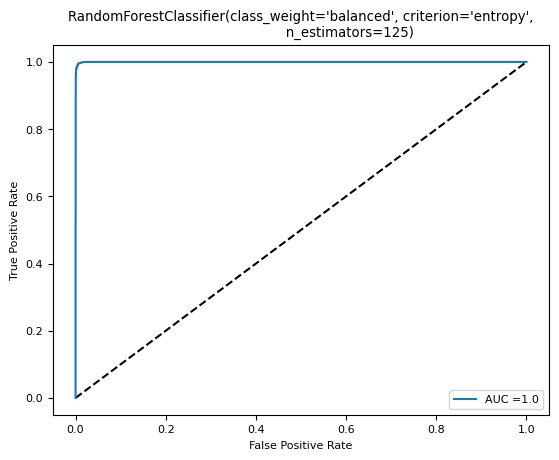

In [148]:
auc_roc(final_model_cls)

In [149]:
import pickle
filename = 'primary_fuel_classification.pkl'
pickle.dump(final_model_cls,open(filename,'wb'))

In [150]:
Actual = np.array(y_test)
predicted = np.round(np.array(final_model_cls.predict(x_test)),0)
gpp_prediction = pd.DataFrame({'Actual Primary Fuel':Actual,'Predicted Primary Fuel':predicted})
gpp_prediction

,Actual Primary Fuel,Predicted Primary Fuel
0,11,11
1,11,11
2,2,2
3,6,6
4,3,3
...,...,...
15071,8,8
15072,0,0
15073,3,3
15074,1,1


# 2) Prediction using Target : 'Capacity_mw'

# Splitting the dataset

In [76]:
#Splitting the data into 'x' and 'y' labels-
x=g_pp.drop('capacity_mw',axis =1)
y=g_pp['capacity_mw']

print(x.shape)
print(y.shape)

(13298, 11)
(13298,)


In [77]:
print(y.value_counts())

0.0      2030
5.0       552
1.0       534
2.0       479
1.5       267
         ... 
772.0       1
119.1       1
251.8       1
153.9       1
596.7       1
Name: capacity_mw, Length: 2305, dtype: int64


# Cheking the skewness

In [78]:
x.skew().sort_values(ascending=False)

other_fuel2            11.634215
generation_gwh_2017     8.343430
generation_gwh_2018     8.281069
generation_gwh_2016     8.256460
generation_gwh_2015     8.187213
generation_gwh_2014     8.023305
longitude               2.331246
other_fuel1             0.954362
primary_fuel           -0.419215
latitude               -1.864012
commissioning_year     -1.867007
dtype: float64

# Removing the skewness

In [79]:
from sklearn.preprocessing import power_transform
cols = ['generation_gwh_2015','generation_gwh_2014','generation_gwh_2017','generation_gwh_2016','generation_gwh_2018','primary_fuel','longitude','commissioning_year','other_fuel1','other_fuel1']
for col in cols:
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [80]:
x.skew().sort_values(ascending=False)

other_fuel2            11.634215
longitude               0.916164
other_fuel1             0.284135
primary_fuel           -0.316975
commissioning_year     -0.557185
latitude               -1.864012
generation_gwh_2014    -2.035896
generation_gwh_2016    -2.102325
generation_gwh_2015    -2.227292
generation_gwh_2017    -3.283202
generation_gwh_2018    -4.491064
dtype: float64

The 'other_fuel2' column has higher skewness, so we will drop it.

In [81]:
x = x.drop(['other_fuel2'],axis = 1)

# Removing Outliers

In [82]:
# Removing Outliers
from scipy.stats import zscore
gpp_2=x.copy()

gpp_2.drop('other_fuel1',axis=1,inplace=True)
gpp_2['capacity_mw']=y.copy()

z=np.abs(zscore(gpp_2))
gpp_new2= gpp_2[(z < 3).all(axis=1)] 
gpp_new2['other_fuel1'] = x['other_fuel1']
gpp_new2

,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,capacity_mw,other_fuel1
512,28.1839,2.333463,0.584506,0.640343,0.184289,0.200470,0.201365,0.206693,0.216893,2.5,0.058649
513,24.7663,2.336522,-1.771646,-0.253631,0.184289,0.200470,0.201365,0.206693,0.216893,98.0,0.058649
514,21.9038,2.324724,1.479868,-0.253631,0.184289,0.200470,0.201365,0.206693,0.216893,39.2,0.058649
515,23.8712,2.372722,-1.311049,0.119876,0.168635,0.389142,0.467417,0.319082,0.313693,135.0,0.058649
517,23.7689,2.323062,-1.771646,0.189249,0.592647,0.662356,0.680592,0.685810,0.585526,250.0,0.058649
...,...,...,...,...,...,...,...,...,...,...,...
13293,42.8869,0.278384,1.479868,0.721690,-0.582966,-0.561809,-0.495026,-0.457971,-0.423985,3.4,0.058649
13294,44.3195,-0.216652,0.584506,1.250496,0.184289,0.200470,0.201365,0.206693,-0.430531,1.0,0.058649
13295,44.0460,-0.219557,0.584506,-0.253631,0.184289,0.200470,0.201365,0.206693,0.216893,0.0,0.058649
13296,39.7373,-0.624168,0.584506,-0.253631,-0.594735,-0.574609,0.201365,0.206693,0.216893,0.0,0.058649


In [83]:
#if we check the previous data dimension along with the dropped column 'other_fuel1'
gpp_2['other_fuel1']=x['other_fuel1']
gpp_2.shape

(13298, 11)

In [84]:
gpp_new2.shape

(12355, 11)

In [85]:
# Checking the percentage of data loss -
loss = (gpp_2.shape[0]-gpp_new2.shape[0])/gpp_2.shape[0]*100
loss

7.0912919235975345

In [86]:
gpp_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12355 entries, 512 to 13297
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             12355 non-null  float64
 1   longitude            12355 non-null  float64
 2   primary_fuel         12355 non-null  float64
 3   commissioning_year   12355 non-null  float64
 4   generation_gwh_2014  12355 non-null  float64
 5   generation_gwh_2015  12355 non-null  float64
 6   generation_gwh_2016  12355 non-null  float64
 7   generation_gwh_2017  12355 non-null  float64
 8   generation_gwh_2018  12355 non-null  float64
 9   capacity_mw          12355 non-null  float64
 10  other_fuel1          12355 non-null  float64
dtypes: float64(11)
memory usage: 1.1 MB


In [87]:
X = gpp_new2.drop('capacity_mw',axis = 1)
Y = gpp_new2['capacity_mw']
z = X.columns

# scalling the data using standard scaler -

In [88]:
# scalling the data using standard scaler -
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)
X = pd.DataFrame(X,columns = z)
X


,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,other_fuel1
0,-1.362501,2.824256,0.542424,0.610543,0.599101,0.623052,0.654705,0.695739,0.709663,0.055319
1,-1.846008,2.827777,-1.883953,-0.274096,0.599101,0.623052,0.654705,0.695739,0.709663,0.055319
2,-2.250983,2.814196,1.464473,-0.274096,0.599101,0.623052,0.654705,0.695739,0.709663,0.055319
3,-1.972643,2.869448,-1.409628,0.095511,0.565699,1.017392,1.239210,0.950543,0.927864,0.055319
4,-1.987116,2.812283,-1.883953,0.164159,1.470453,1.588429,1.707548,1.781969,1.540615,0.055319
...,...,...,...,...,...,...,...,...,...,...
12350,0.717617,0.458579,1.464473,0.691041,-1.038067,-0.970172,-0.875240,-0.811152,-0.734966,0.055319
12351,0.920295,-0.111276,0.542424,1.214326,0.599101,0.623052,0.654705,0.695739,-0.749723,0.055319
12352,0.881602,-0.114620,0.542424,-0.274096,0.599101,0.623052,0.654705,0.695739,0.709663,0.055319
12353,0.272025,-0.580382,0.542424,-0.274096,-1.063178,-0.996925,0.654705,0.695739,0.709663,0.055319


In [89]:
X.shape

(12355, 10)

In [90]:
Y.shape

(12355,)

# Checking multicollinearity using Variance Inflation Factor


In [91]:
vifscore(X)

,Column Name,VIF Factor
7,generation_gwh_2017,8.631762
6,generation_gwh_2016,8.436239
5,generation_gwh_2015,8.039464
8,generation_gwh_2018,5.583951
4,generation_gwh_2014,5.304878
3,commissioning_year,1.481662
2,primary_fuel,1.324101
0,latitude,1.280210
1,longitude,1.263673
9,other_fuel1,1.011712


# model building

In [92]:
#Model 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

#Reguralization technique
from sklearn.linear_model import Lasso,Ridge,ElasticNet

from sklearn.model_selection import cross_val_score

#Metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [93]:
def random_st_reg(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(X,Y,test_size = 0.20, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = r2_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs


In [94]:
def model_fit_reg(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(X,Y,test_size = 0.20, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    r2 = r2_score(y_test,pred_test)
    mse = mean_squared_error(y_test,pred_test)
    mae = mean_absolute_error(y_test,pred_test)
    cv_score = cross_val_score(model,X,Y, cv = 8)
    cv_mean = cv_score.mean()
    print("\n R2 score is ", r2)
    print("-"*50)
    print("Mean Sqaured Error is ",mse)
    print("-"*50)
    print("Mean Absolute Error is ",mae)
    print("-"*50)
    print("The cv score is ", cv_mean, "and the R2 score  is ",r2)
    print(f'\n Difference between accuracy score and cross val score {(r2-cv_mean)*100:.2f}')
    print("-"*50)

In [95]:
def model_reg(m):
    m_rs = random_st_reg(m)
    model_fit_reg(m,m_rs)

In [96]:
Model_regres = [RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),LinearRegression(),AdaBoostRegressor(),Lasso(),Ridge() ]

In [97]:
for i in Model_regres:
    model_reg(i)


 RandomForestRegressor()
At random state  12 the model is having accuracy score of  0.7832690285829867

 R2 score is  0.7863135957488618
--------------------------------------------------
Mean Sqaured Error is  4874.610541226451
--------------------------------------------------
Mean Absolute Error is  25.50801038489874
--------------------------------------------------
The cv score is  0.6933061755987904 and the R2 score  is  0.7863135957488618

 Difference between accuracy score and cross val score 9.30
--------------------------------------------------

 KNeighborsRegressor()
At random state  12 the model is having accuracy score of  0.7192156888588161

 R2 score is  0.7192156888588161
--------------------------------------------------
Mean Sqaured Error is  6405.246827454779
--------------------------------------------------
Mean Absolute Error is  29.83005851881829
--------------------------------------------------
The cv score is  0.6442480116015427 and the R2 score  is  0.71921

# Hyper Paramter Tuning of RandomForestRegressor

In [131]:
parameters = {'n_estimators':[100,125,150,200],
             'criterion': ['squared_error','absolute_error'],
             'max_features': ['sqrt','log2'],
             'max_depth':[10,20,30,None]}

grid_reg = GridSearchCV(estimator = RandomForestRegressor(),param_grid=parameters, cv = 3,n_jobs=-1)


In [132]:
grid_reg.fit(X,Y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 125, 150, 200]})

In [133]:
grid_reg.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [134]:
grid_reg.best_score_

0.7177300735178053

In [135]:
x_train, x_test,y_train,y_test= train_test_split(X,Y,test_size = 0.20, random_state = 47)

In [136]:
final_model_reg = RandomForestRegressor(n_estimators=100,max_depth= None,max_features='sqrt',criterion='squared_error')
final_model_reg.fit(x_train,y_train)
pred_reg = final_model_reg.predict(x_test)
print('R2 Score',r2_score(y_test,pred_reg))
print('Mean Squared Error',mean_squared_error(y_test,pred_reg))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_reg))
cv_score = cross_val_score(final_model_reg,X,Y, cv = 5)
cv_mean =cv_score.mean()
print("At cv fold",5," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(y_test,pred_reg))

R2 Score 0.7671814398206414
Mean Squared Error 6047.631812109929
Mean Absolute Error 28.132906128822206
At cv fold 5  the cv score is  0.7199120561654082 and the R2 score  is  0.7671814398206414


In [103]:
import pickle
filename = 'Global power plant prediction-regression.pkl'
pickle.dump(final_model_reg,open(filename,'wb'))

In [104]:
actual = np.array(y_test)
predicted = np.round(np.array(final_model_reg.predict(x_test)),2)

prediction_test = pd.DataFrame({'Actual Power plant-capacity_mw':actual,'Predicted Power plant- capacity_mw':predicted})
prediction_test

,Actual Power plant-capacity_mw,Predicted Power plant- capacity_mw
0,42.0,52.18
1,36.9,1.24
2,0.0,0.00
3,2.2,10.70
4,167.8,103.14
...,...,...
2466,655.0,589.13
2467,55.5,89.53
2468,2.4,11.23
2469,897.0,642.50
